In [4]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer

In [5]:
df = pd.read_csv('ILPD.csv', encoding ='iso-8859-1', sep=',')

In [6]:
df.head()

,age,gender,total_bilirubin,direct_bilirubin,total_proteins,albumin,a/g_ratio,sgpt,sgot,alkphos,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Total Proteins      0
Albumin             0
A/G Ratio           0
SGPT                0
SGOT                0
Alkphos             4
Selector            0
dtype: int64

 Zamjena null vrijednosti varijable 'Alkphos' sa medijanom - nisam koristio ovaj način jer bi to utjecalo na information value
 
 median = df['Alkphos'].median()
df['Alkphos'].fillna(median, inplace = True)

In [5]:
# zamjena null ili missing vrijednosti s -1

df['Alkphos'] = df['Alkphos'].fillna(-1)
df.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Total Proteins      0
Albumin             0
A/G Ratio           0
SGPT                0
SGOT                0
Alkphos             0
Selector            0
dtype: int64

In [6]:
df = df.rename(columns={'Total Bilirubin'  : 'total_bilirubin', 
                        'Direct Bilirubin' : 'direct_bilirubin',
                        'Total Proteins'   : 'total_protein',
                        'A/G Ratio'        : 'ag_ratio'
                       })

In [7]:
df.columns = [c.lower() for c in df.columns]
df.tail(15)

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,selector
568,20,Female,16.7,8.4,200,91,101,6.9,3.5,1.02,1
569,16,Male,7.7,4.1,268,213,168,7.1,4.0,1.20,1
570,16,Male,2.6,1.2,236,131,90,5.4,2.6,0.90,1
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.70,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1


In [8]:
df.head()

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


##### Zamjena kategoričkih varijabli s kontinuiranom vrijednošću 

In [9]:
genderVals = [('Male', 1),
             ('Female', 2)]

def replaceVals(column, vals):
    res = []
    dct = dict(vals);
    for item in column:
        res.append(dct[item])
    return res

# zamjena vrijednosti za pojedinu kategoričku varijablu
def renameCategoricalVals(dataSet):
    dataSet.head()
    dataSet['gender'] = replaceVals(dataSet['gender'], genderVals)
    return dataSet

date = renameCategoricalVals(df)
df.head()

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,selector
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Prepoznavanje distribucija i vizualizacija distribucije za svaku kontinuiranu varijablu

In [10]:
df.describe()

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,1.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.933705,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.356811,0.452490
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,-1.000000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Varijanca - mjeri koliko je svaki pojedini broj u datasetu daleko od srednje vrijednosti, koliki je data spread. 

Standardna devijacija - varijanca mjeri relativno jer je sve na kvadrat, pa se ne dobije točan data spread. Kako bismo dobili točan data spread uzmemo sample variance i korjenujemo ga

In [11]:
df.median()

age                  45.00
gender                1.00
total_bilirubin       1.00
direct_bilirubin      0.30
total_protein       208.00
albumin              35.00
ag_ratio             42.00
sgpt                  6.60
sgot                  3.10
alkphos               0.92
selector              1.00
dtype: float64

Medijan - broj koji dijeli dataset na dva dijela, jedan dio koji je manji od medijana a jedan koji je veći, npr za dataset {1,6,8,2,3}, kada se sortira (za medijan trebamo sortirane vriejdnosti!), onda dolazimo do toga da je medijan 3. Ako dataset ima neparni broj elemenata, onda je medijan onaj broj u sredini, koji dijeli dataset na jednak broj elemenata manjih i većih od tog broja. Ako dataset ima parni broj elemenata tj nema dedicated broja koji dijeli dataset na dva dijela, onda uzmemo srednja dva broja u sortiranom nizu i od njih nađemo aritmetičku sredinu, npr. za {1,2,3,4}, medijan će biti 2.5, jer je (2+3)/2 = 2.5

<Figure size 432x288 with 0 Axes>

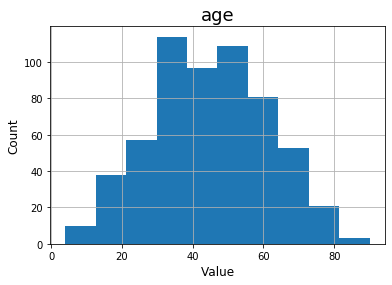

<Figure size 432x288 with 0 Axes>

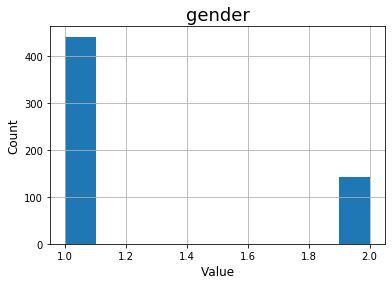

<Figure size 432x288 with 0 Axes>

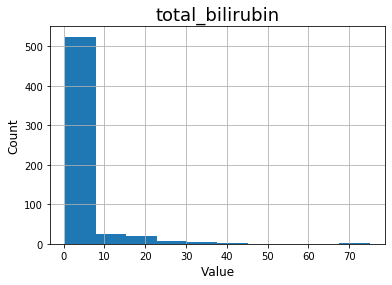

<Figure size 432x288 with 0 Axes>

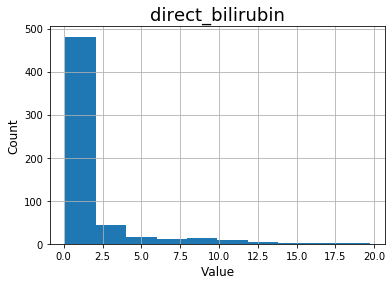

<Figure size 432x288 with 0 Axes>

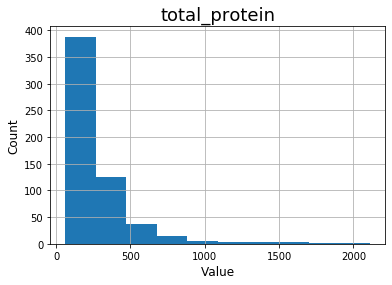

<Figure size 432x288 with 0 Axes>

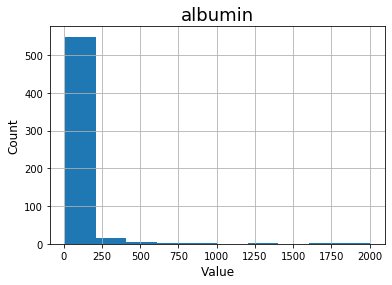

<Figure size 432x288 with 0 Axes>

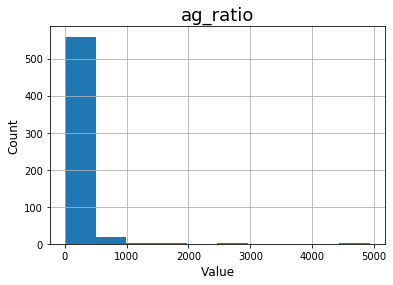

<Figure size 432x288 with 0 Axes>

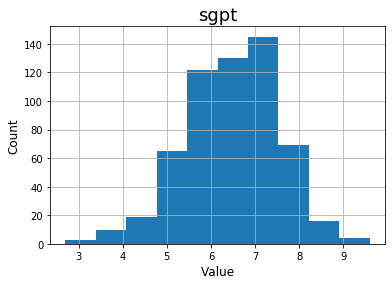

<Figure size 432x288 with 0 Axes>

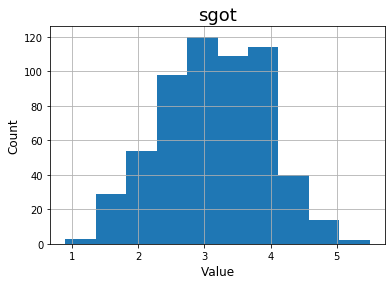

<Figure size 432x288 with 0 Axes>

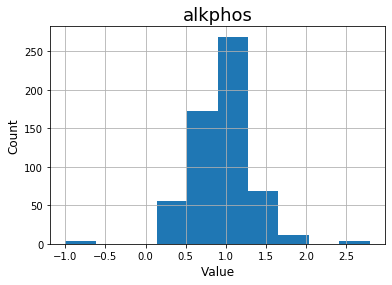

In [12]:
lista = ["age", "gender", "total_bilirubin", "direct_bilirubin", "total_protein", "albumin", "ag_ratio","sgpt", "sgot", "alkphos"]
for column in lista:
    plt.figure()
    df.hist([column])
    plt.title(column, fontsize = 18)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Count', fontsize=12)

##### Prikaz distribucije za kategoričku varijablu 'gender'

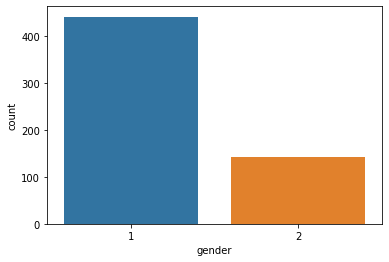

In [13]:
sns.countplot(x='gender',data=df)

##### Prikaz distribucije za kategoričku varijablu 'selector'

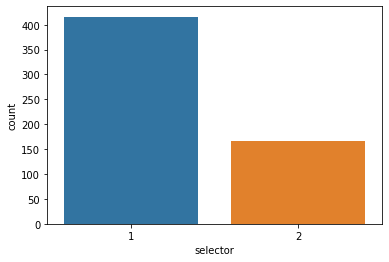

In [14]:
sns.countplot(x='selector',data=df)

#### Izračun meana, z-vrijednosti, skewnessa i kurtosisa

In [15]:
# aritmeticka sredina
df.mean()

age                  44.746141
gender                1.243568
total_bilirubin       3.298799
direct_bilirubin      1.486106
total_protein       290.576329
albumin              80.713551
ag_ratio            109.910806
sgpt                  6.483190
sgot                  3.141852
alkphos               0.933705
selector              1.286449
dtype: float64

In [16]:
# z vrijednosti

zdata = df.copy()

for column in zdata:
    zscore = column + '_zScore'
    zdata[zscore] = (zdata[column] - zdata[column].mean())/zdata[column].std(ddof=0)

zdata.head(10)

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,...,gender_zScore,total_bilirubin_zScore,direct_bilirubin_zScore,total_protein_zScore,albumin_zScore,ag_ratio_zScore,sgpt_zScore,sgot_zScore,alkphos_zScore,selector_zScore
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,...,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.094543,-0.633595
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,...,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.543345,-0.633595
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,...,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.122593,-0.633595
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,...,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.185959,-0.633595
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,...,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.497050,-0.633595
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,...,-0.567446,-0.241578,-0.280143,-0.340199,-0.338224,-0.332250,1.029773,1.582902,1.027463,-0.633595
6,26,2,0.9,0.2,154,16,12,7.0,3.5,1.00,...,1.762281,-0.386642,-0.458327,-0.562669,-0.354665,-0.339178,0.476533,0.450593,0.185959,-0.633595
7,29,2,0.9,0.3,202,14,11,6.7,3.6,1.10,...,1.762281,-0.386642,-0.422690,-0.364918,-0.365626,-0.342642,0.199913,0.576405,0.466460,-0.633595
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,...,-0.567446,-0.386642,-0.422690,-0.364918,-0.321782,-0.314929,0.845360,1.205465,0.746961,1.578296
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,...,-0.567446,-0.418878,-0.458327,-0.002374,-0.151885,-0.179827,0.292120,0.324781,0.185959,-0.633595


In [17]:
# kurtosis ("peakedness")
print("KURTOSIS")
print(df.copy().kurtosis())

# skewness (nagnutost)
print("\nSKEWNESS")
print(df.copy().skew())

KURTOSIS
age                  -0.560066
gender               -0.566947
total_bilirubin      37.163792
direct_bilirubin     11.352529
total_protein        17.752828
albumin              50.579450
ag_ratio            150.919884
sgpt                  0.233039
sgot                 -0.387905
alkphos               7.113108
selector             -1.106735
dtype: float64

SKEWNESS
age                 -0.029385
gender               1.197919
total_bilirubin      4.907474
direct_bilirubin     3.212403
total_protein        3.765106
albumin              6.549192
ag_ratio            10.546177
sgpt                -0.285672
sgot                -0.043685
alkphos             -0.299729
selector             0.947140
dtype: float64


In [18]:
# ovdje se može vidjeti nagnutost distribucije
# gdje se vidi da su varijable age, sgpt i sgot skoro pa normalno distribuirane, odnosno skew je blizu nule, dok su
# varijable total i drect_bilirubin i total_protein, albumin i ag_ratio jako pozitivno skewane, odnosno većina vrijednosti 
# je u normalnim razinama tipičnim za normalne tjelesne vrijednosti, dok poneki ljudi imaju veće ili mnogo veće vrijednosti
# stoga se dobiva pozitivno skewani graf

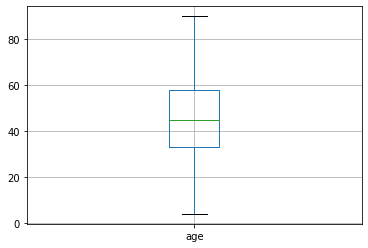

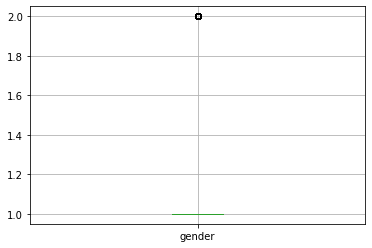

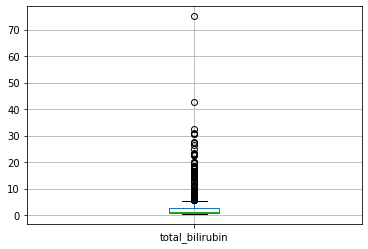

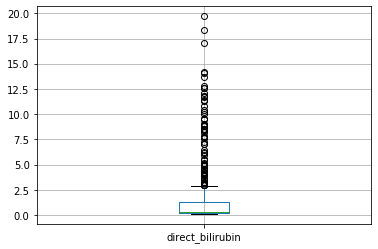

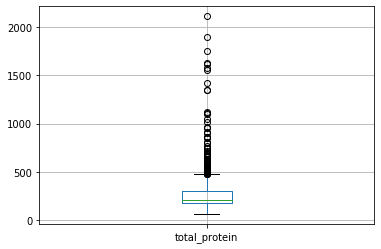

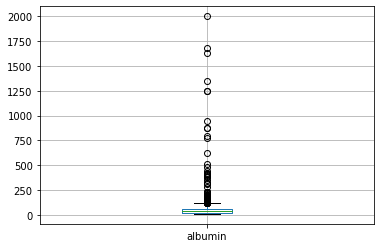

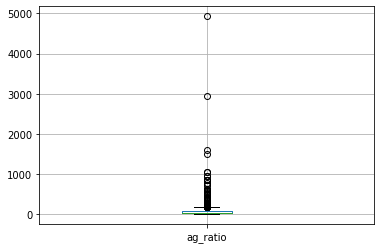

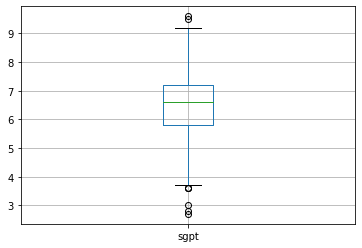

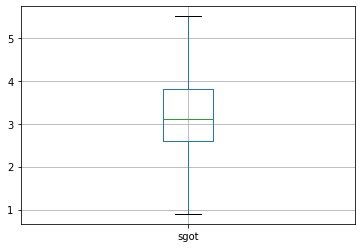

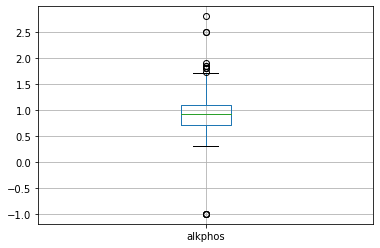

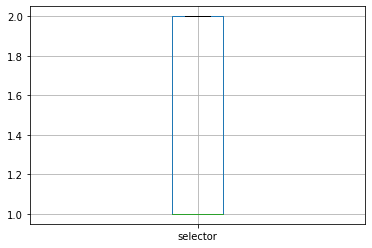

In [19]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [27]:
# Distribucija varijabli

# s obzirom da boxplot prikazuje podatke prema kvartilima, njime se može vidjeti raspodjela podatka pojedine varijable 

# age
# što se tiče ove varijable možemo vidjeti kombinacijom histplota i boxplota da najviše ima vrijednosti između 
# prvog i trećeg kvartila (te nema outliera)
# dodatno možemo vidjeti da je distribucija skoro pa normalna (gaussova), jer imamo najviše srednjih vrijednosti
# a najmanje krajnjih vrijednosti, odnosno što se više ide u ekstreme, to ima manje vrijednosti
# također, dobivenom vrijednošću skewa, možemo vidjeti da je distribucija varijable age skewana blago negativno

# gender
# distribucija je binomna, imamo samo vrijednosti Male i Female, odnosno pretvoreno u numeričko obilježje, 0 i 1.
# srednjih vrijednosti između 0 i 1 nema jer je varijabla kategorička

# total_bilirubin
# za total_bilirubin je većina vrijednosti između 0 i 10,
# no ima jako puno outliera što vidimo na boxplotu, medijan je na 1.0 i većina data pointova se nalazi oko njega
# fiktivni maximum je na ~5 a minimum na ~ 0, no outliera čak ima koji idu do 70
# ova varijabla je jako pozitivno skewana, te je distribucija eksponencijalna, jer ima najviše vrijednosti oko nule, te
# što se više odmičemo od 0 to ima manje vrijednosti
# nakon vrijednosti od cca 45, distribucija je uniformna, odnosno pojavljuju se outlieri između cca 68 i 72

# direct_bilirubin
# slično kao i za direct bilirubin, najviše vrijednosti se nalazi između 0 i 2.5.. medijan je  0.3 te je većina
# data pointova oko medijana.. ima puno outliera, najdalji ide do vrijednosti 20
# ova varijabla je jako pozitivno skewana, te je distribucija eksponencijalna, jer ima najviše vrijednosti oko nule, odnosno 
# između 0 i 2, te što se više odmičemo od 0 to ima manje vrijednosti

# za total protein, albumin, ag_ratio je  slično kao i u prethodna dva slučaja, distribucija je jako pozitivno skewana
# i ima puno outliera
# najviše ima vrijednosti na lijevoj strani grafa
# za albumin i ag_ratio, nakon što početak grafa pokazuje eksponencijalnu razdiobu, nakon vrijednosti 1000 odnosno 2000,
# distribucija počinje biti uniformna

# za sgpt i sgot je distribucija slična kao i kod varijable age, najviše ima vrijednosti bližih srednjoj vrijednosti
# te nema puno outliera - najviše datapointova ima vrijednosti između 5 i 8, odnosno između 2.5 i 4 za sgpt
# tj, kombinacijom boxplota i histplota se opet može zaključiti da se najviše vrijednosti nalazi između 
# prvog i trećeg kvartila
# s obzirom da je najviše vrijednosti između prvog i trećeg kvartila, te najviše ima vrijednosti koje su blizu srednjoj
# vrijednosti varaijbli sgot i sgpt, može se zaključiti da je distribucija blizu normalnoj odnosno gaussovoj distribuciji
# iako su obje distribucije blago negativno skewane

# za alkphos također najviše datapointova je između prvog i trećeg kvartila, te ima ponekih outliera, pa je tako distribucija
# od cca 0.2 do 1.75 blizu normalnoj distribuciji, a izvan ovih granica distrubucija je uniformna

# vezano za ciljnu varijablu, grafički prikazom (countplot) može se vidjeti da najviše ima pacijenata 
# koji nisu dijagnosticirani da imaju bolest jetre, njih oko 400 


In [20]:
# korelacije između featurea i ciljne varijable

df = pd.DataFrame(df)

df[df.columns[0:]].corr()['selector'][:]

age                -0.137351
gender              0.082416
total_bilirubin    -0.220208
direct_bilirubin   -0.246046
total_protein      -0.184866
albumin            -0.163416
ag_ratio           -0.151934
sgpt                0.035008
sgot                0.161388
alkphos             0.127187
selector            1.000000
Name: selector, dtype: float64

In [21]:
# spremanje novog dataseta koji sadrzi samo z vrijednosti
# korelacije između z vrijednosti i ciljne varijable

zdata2 = pd.DataFrame(zdata, columns=['age_zScore', 
                                      'gender_zScore',
                                      'total_bilirubin_zScore', 
                                      'direct_bilirubin_zScore',
                                      'total_protein_zScore',
                                      'albumin_zScore',
                                      'sgpt_zScore',
                                      'sgot_zScore',
                                      'ag_ratio_zScore',
                                      'alkphos_zScore',
                                      'selector_zScore'])

zdata2[zdata2.columns[0:]].corr()['selector_zScore'][:]

age_zScore                -0.137351
gender_zScore              0.082416
total_bilirubin_zScore    -0.220208
direct_bilirubin_zScore   -0.246046
total_protein_zScore      -0.184866
albumin_zScore            -0.163416
sgpt_zScore                0.035008
sgot_zScore                0.161388
ag_ratio_zScore           -0.151934
alkphos_zScore             0.127187
selector_zScore            1.000000
Name: selector_zScore, dtype: float64

In [22]:
# Ovdje možemo vidjeti kako su korelirane varijable u odnosu na ciljnu varijablu. 
# Ako su varijable negativno korelirane, to znači da kada se ciljna varijabla povećava, 
# varijabla koju stavimo u odnos s njom se smanjuje, dok pozitivna korelacija znači 
# da se i ciljna i promatrana varijabla povećavaju (ili analogno smanjuju) u zavisnosti jedna o drugoj 
# to su sgpt, sgot, alkphos; dok su negativno korelirane varijable 
# age, total_bilirubin, direct_bilirubin, total_protein i albumin

# age                -0.137351
# gender              0.082416
# total_bilirubin    -0.220208
# direct_bilirubin   -0.246046
# total_protein      -0.184866
# albumin            -0.163416
# ag_ratio           -0.151934
# sgpt                0.035008
# sgot                0.161388
# alkphos             0.162144

In [23]:
zdata2.head(10)

,age_zScore,gender_zScore,total_bilirubin_zScore,direct_bilirubin_zScore,total_protein_zScore,albumin_zScore,sgpt_zScore,sgot_zScore,ag_ratio_zScore,alkphos_zScore,selector_zScore
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,0.292120,0.198969,-0.318393,-0.094543,-0.633595
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,0.937566,0.073157,-0.034333,-0.543345,-0.633595
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,0.476533,0.198969,-0.145186,-0.122593,-0.633595
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,0.292120,0.324781,-0.311465,0.185959,-0.633595
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,0.753153,-0.933340,-0.176363,-1.497050,-0.633595
5,0.077514,-0.567446,-0.241578,-0.280143,-0.340199,-0.338224,1.029773,1.582902,-0.332250,1.027463,-0.633595
6,-1.158890,1.762281,-0.386642,-0.458327,-0.562669,-0.354665,0.476533,0.450593,-0.339178,0.185959,-0.633595
7,-0.973430,1.762281,-0.386642,-0.422690,-0.364918,-0.365626,0.199913,0.576405,-0.342642,0.466460,-0.633595
8,-1.715272,-0.567446,-0.386642,-0.422690,-0.364918,-0.321782,0.845360,1.205465,-0.314929,0.746961,1.578296
9,0.633896,-0.567446,-0.418878,-0.458327,-0.002374,-0.151885,0.292120,0.324781,-0.179827,0.185959,-0.633595


In [24]:
lista_z = ["age_zScore", 
           "gender_zScore",
           "total_bilirubin_zScore", 
           "direct_bilirubin_zScore", 
           "total_protein_zScore", 
           "albumin_zScore", 
           "ag_ratio_zScore",
           "sgpt_zScore", 
           "sgot_zScore", 
           "alkphos_zScore"]

for column in lista_z:
    values_plus_minus_one_z_score = len(zdata2[zdata2[column].between(-3, 3)==True])
    percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score / len(zdata2) * 100
    substr = column.find('z')
    column = column[0:substr-1]
    print('Percent of ' + column + ' between -3 and 3 std dev from the mean: ' + str(round(percent_values_plus_minus_one_z_score,2)) + '%')

Percent of age between -3 and 3 std dev from the mean: 100.0%
Percent of gender between -3 and 3 std dev from the mean: 100.0%
Percent of total_bilirubin between -3 and 3 std dev from the mean: 97.08%
Percent of direct_bilirubin between -3 and 3 std dev from the mean: 96.74%
Percent of total_protein between -3 and 3 std dev from the mean: 97.43%
Percent of albumin between -3 and 3 std dev from the mean: 98.11%
Percent of ag_ratio between -3 and 3 std dev from the mean: 98.97%
Percent of sgpt between -3 and 3 std dev from the mean: 99.49%
Percent of sgot between -3 and 3 std dev from the mean: 100.0%
Percent of alkphos between -3 and 3 std dev from the mean: 98.8%


In [25]:
# iz ovih vrijednosti z_scorea gdje se gleda koliko su one standardnih devijacija udaljene od srednje vrijednosti, 
# vidi se da su varijable total i direct_bilirubin, total_protein i albumin u većem postotku od drugih udaljeniji od srednje
# vrijednosti, odnosno imaju više outliera

###### Kategorizacija z-vrijednosti u binove [<-3, -3 do 3, >3]

In [26]:
bins = [-1000, -3, 3, 1000]

for column in zdata2: 
    s = zdata2.groupby(pd.cut(zdata[column], bins=bins)).size()
    print(s)

age_zScore
(-1000, -3]      0
(-3, 3]        583
(3, 1000]        0
dtype: int64
gender_zScore
(-1000, -3]      0
(-3, 3]        583
(3, 1000]        0
dtype: int64
total_bilirubin_zScore
(-1000, -3]      0
(-3, 3]        566
(3, 1000]       17
dtype: int64
direct_bilirubin_zScore
(-1000, -3]      0
(-3, 3]        564
(3, 1000]       19
dtype: int64
total_protein_zScore
(-1000, -3]      0
(-3, 3]        568
(3, 1000]       15
dtype: int64
albumin_zScore
(-1000, -3]      0
(-3, 3]        572
(3, 1000]       11
dtype: int64
sgpt_zScore
(-1000, -3]      3
(-3, 3]        580
(3, 1000]        0
dtype: int64
sgot_zScore
(-1000, -3]      0
(-3, 3]        583
(3, 1000]        0
dtype: int64
ag_ratio_zScore
(-1000, -3]      0
(-3, 3]        577
(3, 1000]        6
dtype: int64
alkphos_zScore
(-1000, -3]      4
(-3, 3]        576
(3, 1000]        3
dtype: int64
selector_zScore
(-1000, -3]      0
(-3, 3]        583
(3, 1000]        0
dtype: int64


In [ ]:
# Što se tiče binanja varijabli, one su binnane u binove bins = [-1000, -3, 3, 1000]
# Uglavnom se najviše vrijednosti kod svih varijabli, očekivano, nalazi u srednjem binu, odnosno od -3 do 3

In [28]:
zdata2.head()

,age_zScore,gender_zScore,total_bilirubin_zScore,direct_bilirubin_zScore,total_protein_zScore,albumin_zScore,sgpt_zScore,sgot_zScore,ag_ratio_zScore,alkphos_zScore,selector_zScore
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,0.292120,0.198969,-0.318393,-0.094543,-0.633595
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,0.937566,0.073157,-0.034333,-0.543345,-0.633595
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,0.476533,0.198969,-0.145186,-0.122593,-0.633595
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,0.292120,0.324781,-0.311465,0.185959,-0.633595
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,0.753153,-0.933340,-0.176363,-1.497050,-0.633595


In [29]:
zdata.head()

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,...,gender_zScore,total_bilirubin_zScore,direct_bilirubin_zScore,total_protein_zScore,albumin_zScore,ag_ratio_zScore,sgpt_zScore,sgot_zScore,alkphos_zScore,selector_zScore
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,...,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.094543,-0.633595
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,...,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.543345,-0.633595
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,...,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.122593,-0.633595
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,...,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.185959,-0.633595
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,...,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.497050,-0.633595


In [30]:
cat_df = df.copy()

In [31]:
def woe_iv_calculation(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append(OrderedDict({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 2)].count()[feature],
            
        }))
        #print(lst)
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    sns.factorplot("Value",'WoE', data=dset,kind="bar",palette="Blues",size=11,aspect=3,legend_out=True)

    print (feature)   
    #sns.factorplot("Value",'WoE', data=dset,kind="bar") 
    return dset, iv

In [32]:
# klasiranje varijabli u binnove, pošto se obično uzima između 10 i 20 binova, ili još bolje 10% opservacija u svakom binu
# s obzirom da je dataset prilično malen postavljeno je 10 binova

#strongest = ['age', 'total_protein','albumin', 'ag_ratio', 'sgot']
for column in cat_df.columns:
    cat_df[column + '_bin'] = pd.qcut(cat_df[column], q=10, precision=0, duplicates='drop')
        
cat_df.head()

,age,gender,total_bilirubin,direct_bilirubin,total_protein,albumin,ag_ratio,sgpt,sgot,alkphos,...,gender_bin,total_bilirubin_bin,direct_bilirubin_bin,total_protein_bin,albumin_bin,ag_ratio_bin,sgpt_bin,sgot_bin,alkphos_bin,selector_bin
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,...,"(0.0, 2.0]","(0.30000000000000004, 0.7]","(0.0, 0.2]","(182.0, 195.0]","(9.0, 18.0]","(9.0, 19.0]","(6.6, 6.9]","(3.1, 3.3]","(0.8, 0.9]","(0.0, 2.0]"
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,...,"(0.0, 2.0]","(7.9, 75.0]","(4.1, 19.7]","(511.0, 2110.0]","(53.0, 74.0]","(71.0, 105.0]","(7.3, 7.9]","(3.1, 3.3]","(0.7, 0.8]","(0.0, 2.0]"
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,...,"(0.0, 2.0]","(3.3, 7.9]","(4.1, 19.7]","(324.0, 511.0]","(53.0, 74.0]","(54.0, 71.0]","(6.9, 7.1]","(3.1, 3.3]","(0.8, 0.9]","(0.0, 2.0]"
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,...,"(0.0, 2.0]","(0.9, 1.0]","(0.3, 0.6]","(167.0, 182.0]","(9.0, 18.0]","(19.0, 23.0]","(6.6, 6.9]","(3.3, 3.6]","(0.92, 1.0]","(0.0, 2.0]"
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,...,"(0.0, 2.0]","(3.3, 7.9]","(1.6, 4.1]","(182.0, 195.0]","(25.0, 29.0]","(54.0, 71.0]","(7.1, 7.3]","(2.0, 2.5]","(-1.01, 0.5]","(0.0, 2.0]"


WoE and IV for column: age
age
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      65   17     7   10    0.016827   0.059880 -1.269366  0.054650
1      62    9     6    3    0.014423   0.017964 -0.219544  0.000777
2      58   14    12    2    0.028846   0.011976  0.879068  0.014830
3      72    8     7    1    0.016827   0.005988  1.033219  0.011199
4      46   16    16    0    0.038462   0.000000  0.000000  0.000000
..    ...  ...   ...  ...         ...        ...       ...       ...
67     11    1     0    1    0.000000   0.005988  0.000000 -0.000000
68     73    2     2    0    0.004808   0.000000  0.000000  0.000000
69     67    1     1    0    0.002404   0.000000  0.000000  0.000000
70     10    1     1    0    0.002404   0.000000  0.000000  0.000000
71     90    1     1    0    0.002404   0.000000  0.000000  0.000000

[72 rows x 8 columns]
IV score: 0.72


WoE and IV for column: gender
gender
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE       

sgot
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE            IV
0     3.3   21    15    6    0.036058   0.035928  0.003599  4.662822e-07
1     3.2   26    17    9    0.040865   0.053892 -0.276703  3.604559e-03
2     3.4   21    19    2    0.045673   0.011976  1.338600  4.510685e-02
3     2.4   17    15    2    0.036058   0.011976  1.102212  2.654307e-02
4     4.4    8     2    6    0.004808   0.035928 -2.011304  6.259268e-02
5     3.5   23    14    9    0.033654   0.053892 -0.470859  9.529412e-03
6     3.6   18    11    7    0.026442   0.041916 -0.460706  7.128905e-03
7     4.1   16     8    8    0.019231   0.047904 -0.912691  2.616999e-02
8     2.7   24    21    3    0.050481   0.017964  1.033219  3.359686e-02
9     3.0   45    34   11    0.081731   0.065868  0.215774  3.422713e-03
10    2.3   12     6    6    0.014423   0.035928 -0.912691  1.962749e-02
11    3.1   28    21    7    0.050481   0.041916  0.185921  1.592338e-03
12    2.6   21    16    5    0.038462   0.0299

ag_ratio_bin
             Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      (9.0, 19.0]   67    39   28    0.093750   0.167665 -0.581334  0.042969
1    (71.0, 105.0]   57    48    9    0.115385   0.053892  0.761285  0.046813
2     (54.0, 71.0]   56    44   12    0.105769   0.071856  0.386592  0.013110
3     (19.0, 23.0]   57    27   30    0.064904   0.179641 -1.018052  0.116808
4     (28.0, 34.0]   64    42   22    0.100962   0.131737 -0.266064  0.008188
5     (34.0, 42.0]   56    36   20    0.086538   0.119760 -0.324905  0.010794
6     (42.0, 54.0]   54    39   15    0.093750   0.089820  0.042820  0.000168
7  (190.0, 4929.0]   58    56    2    0.134615   0.011976  2.419513  0.296727
8     (23.0, 28.0]   55    33   22    0.079327   0.131737 -0.507226  0.026584
9   (105.0, 190.0]   59    52    7    0.125000   0.041916  1.092642  0.090781
IV score: 0.65


WoE and IV for column: sgpt_bin
sgpt_bin
        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        I

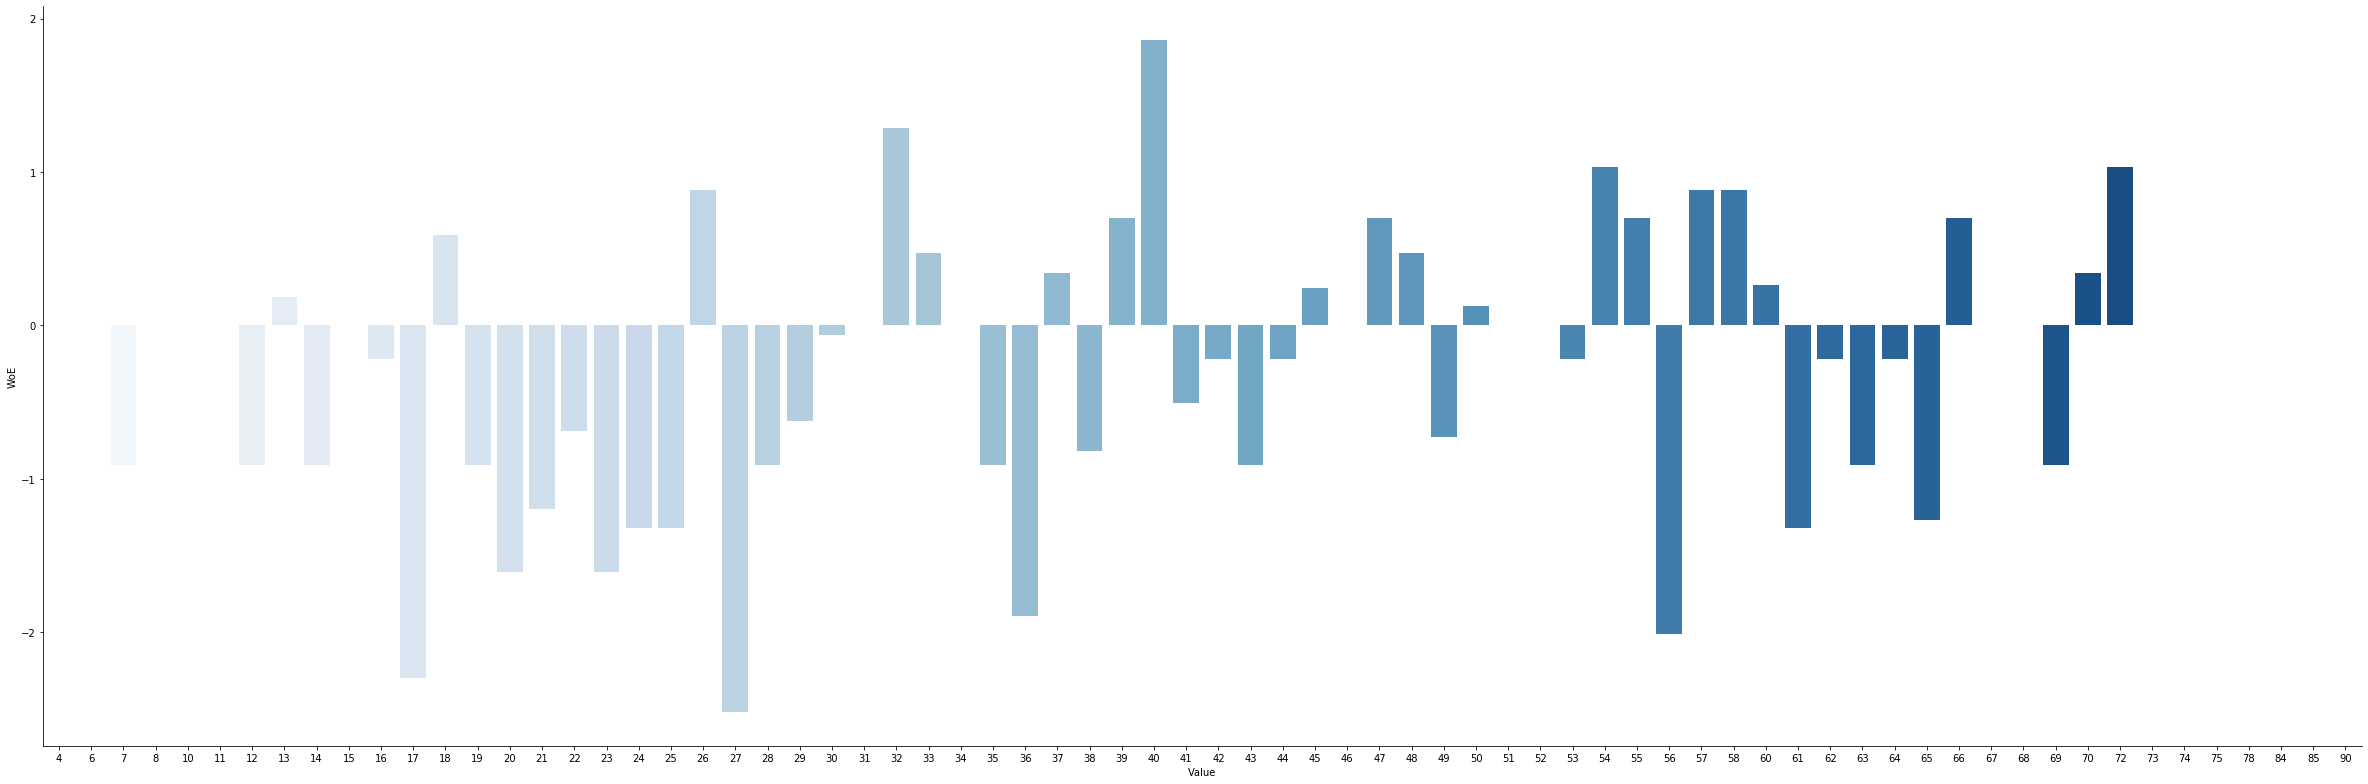

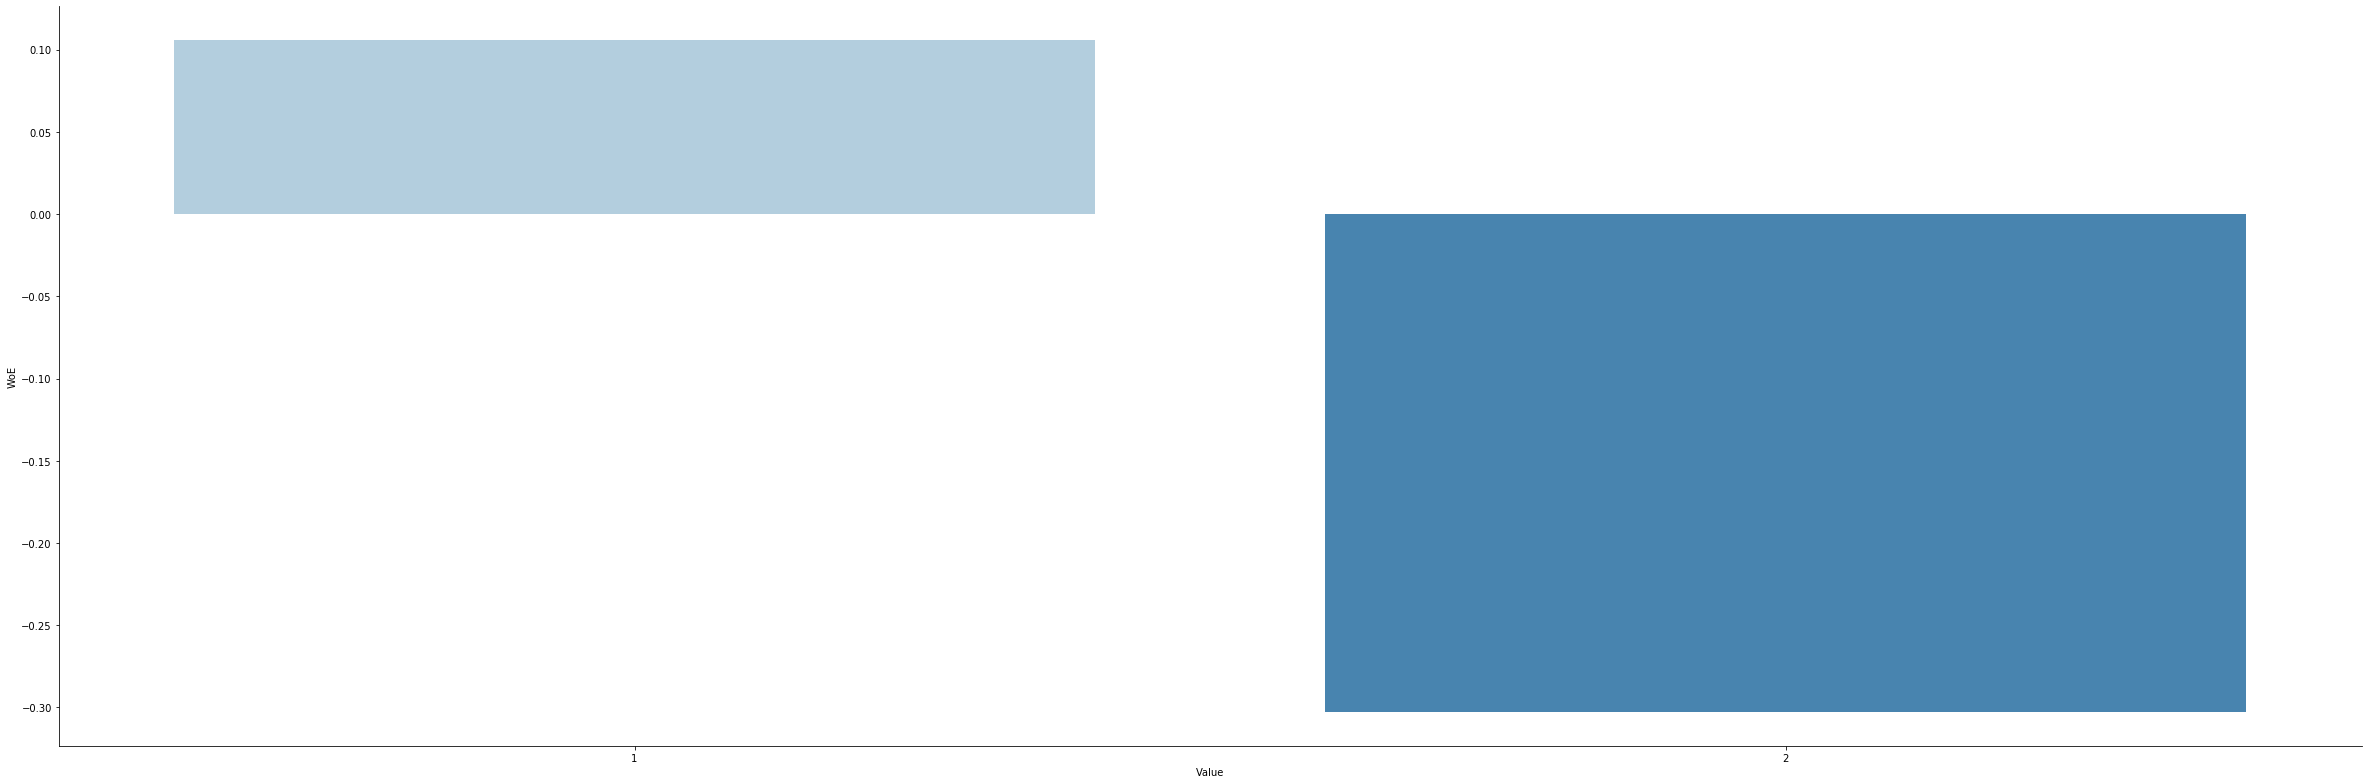

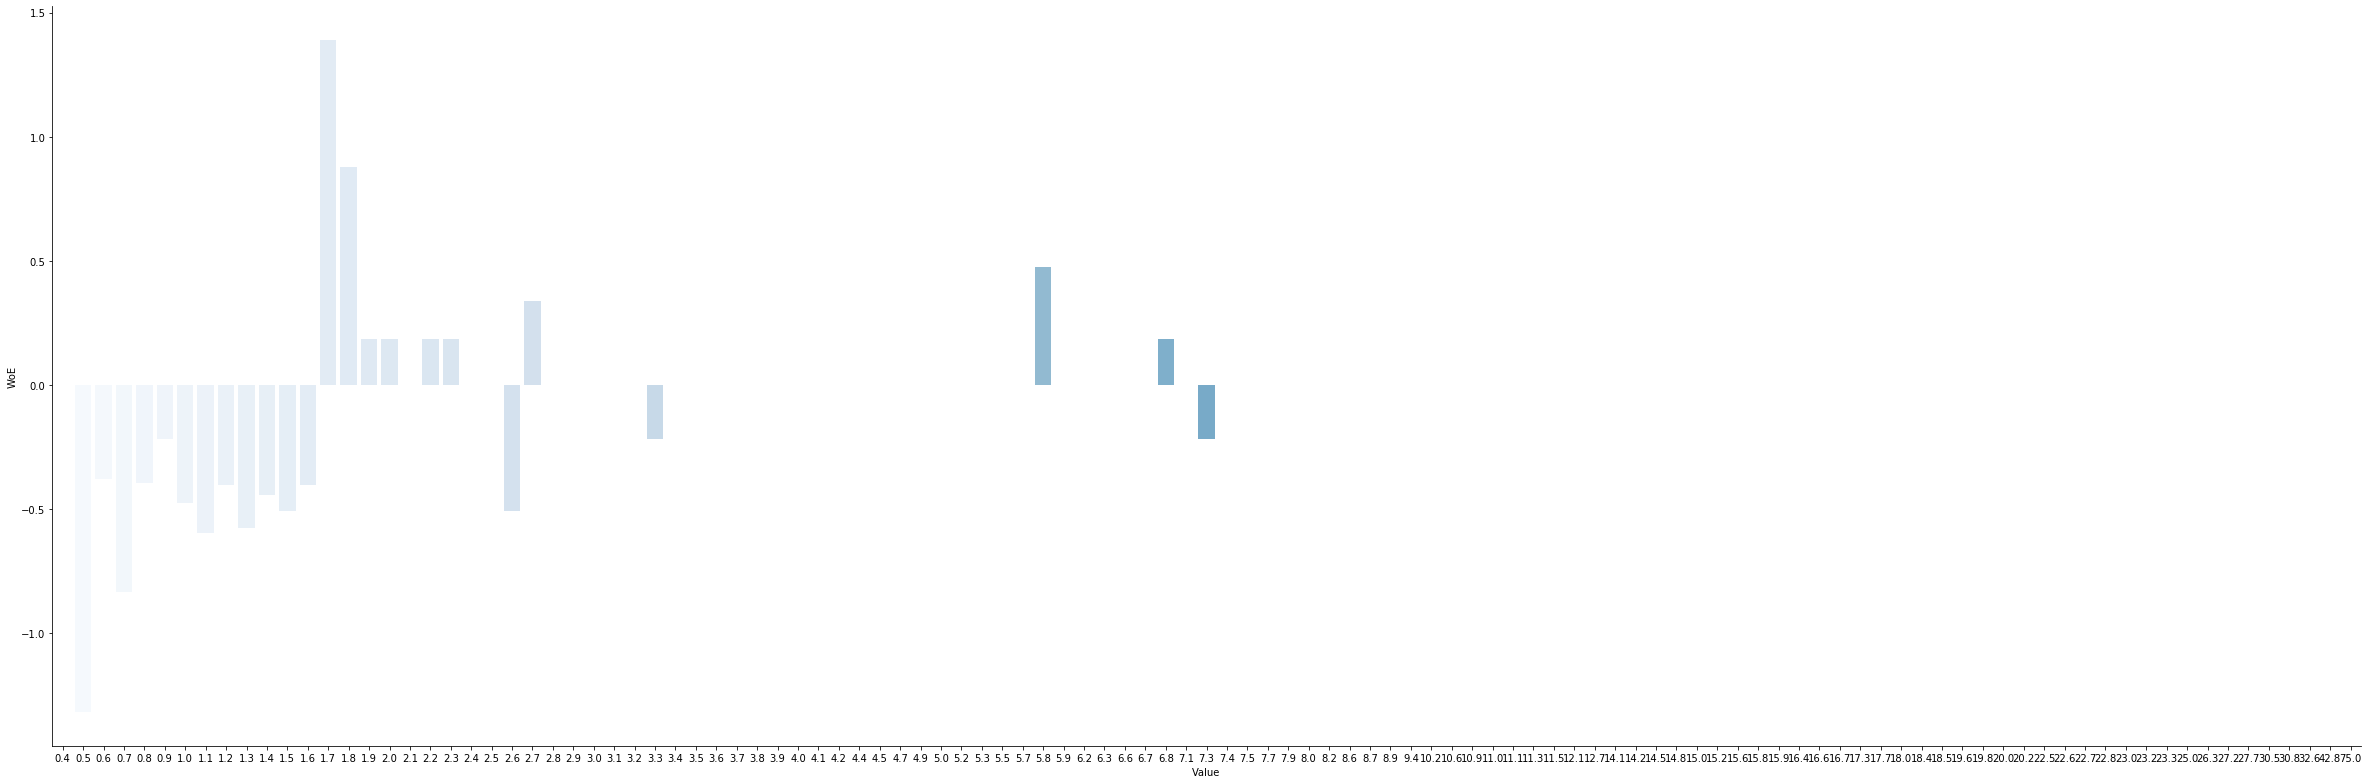

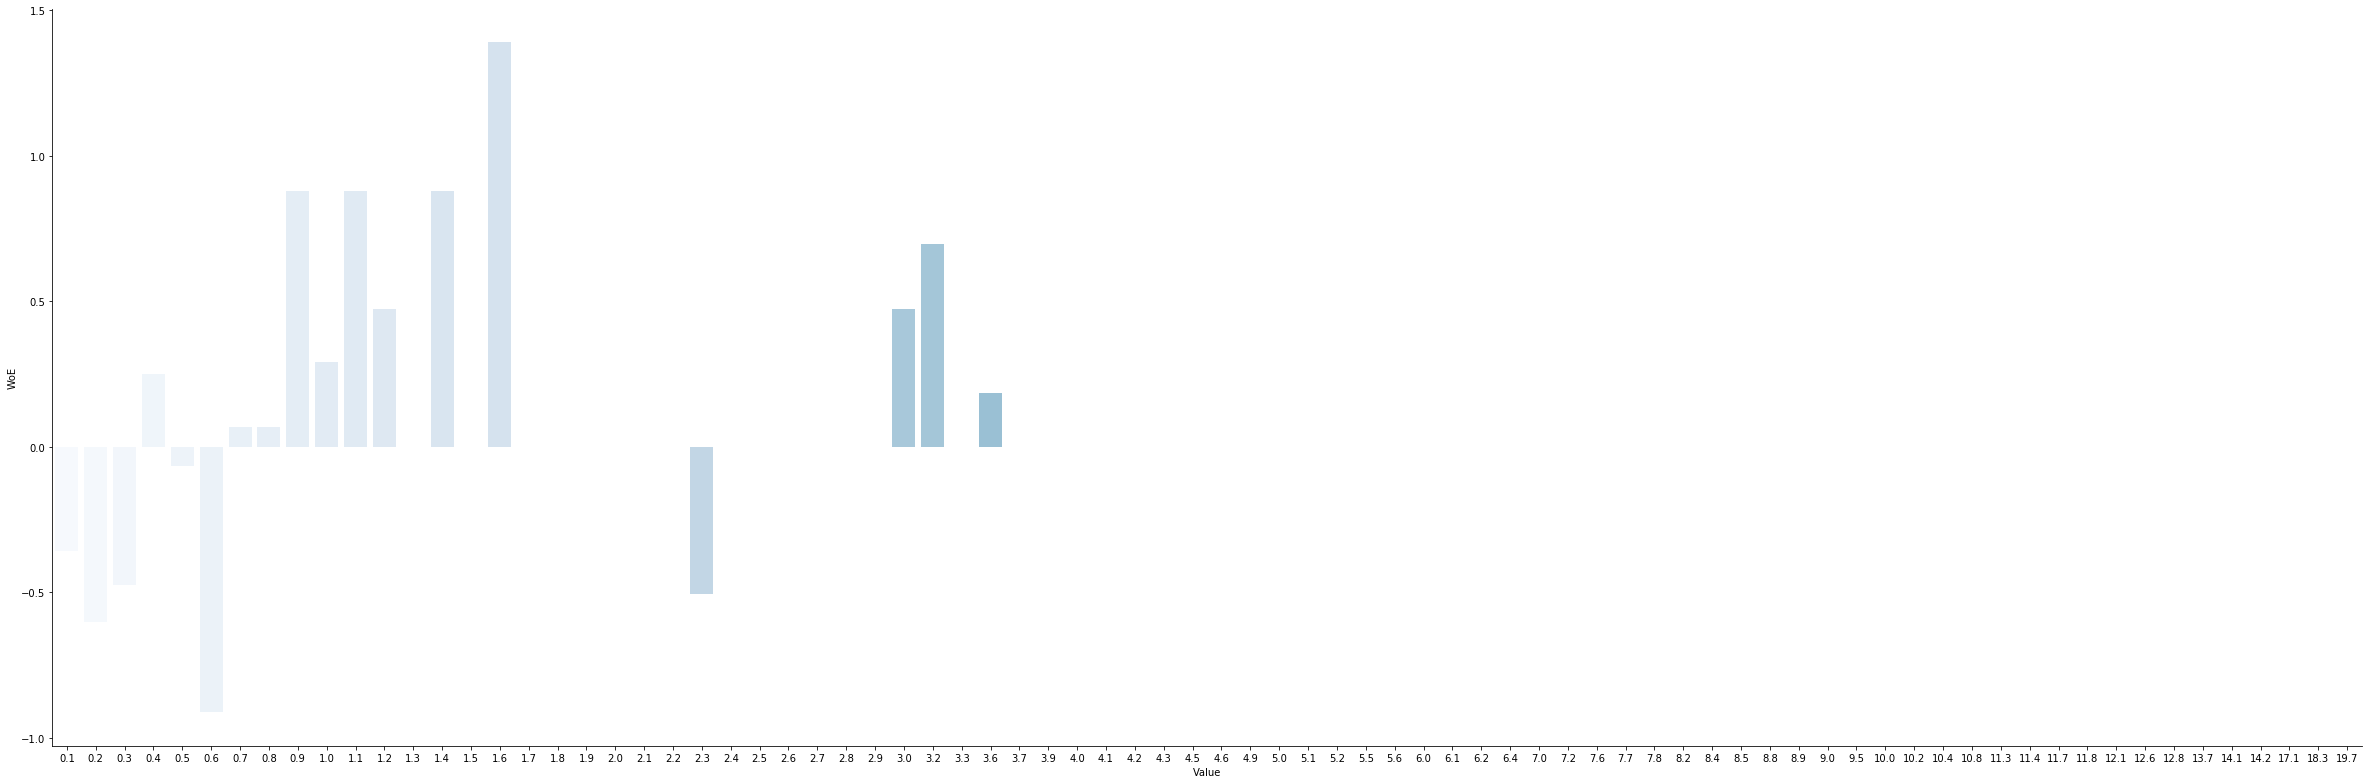

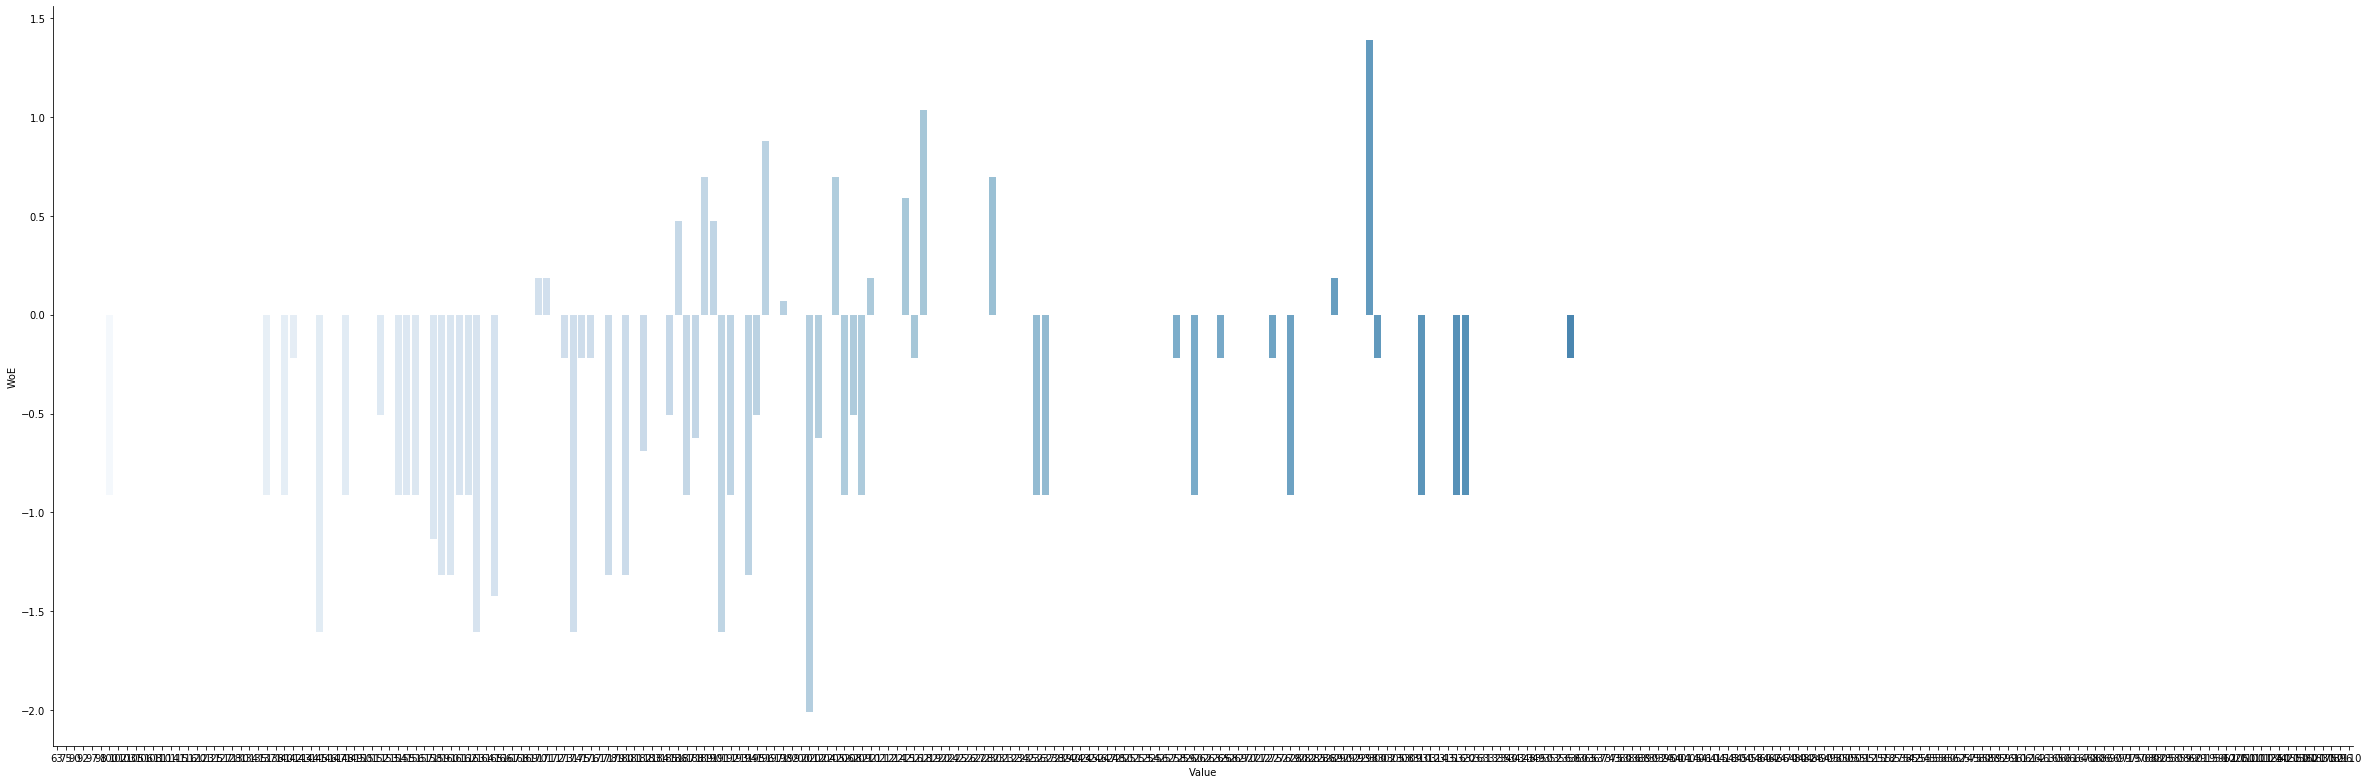

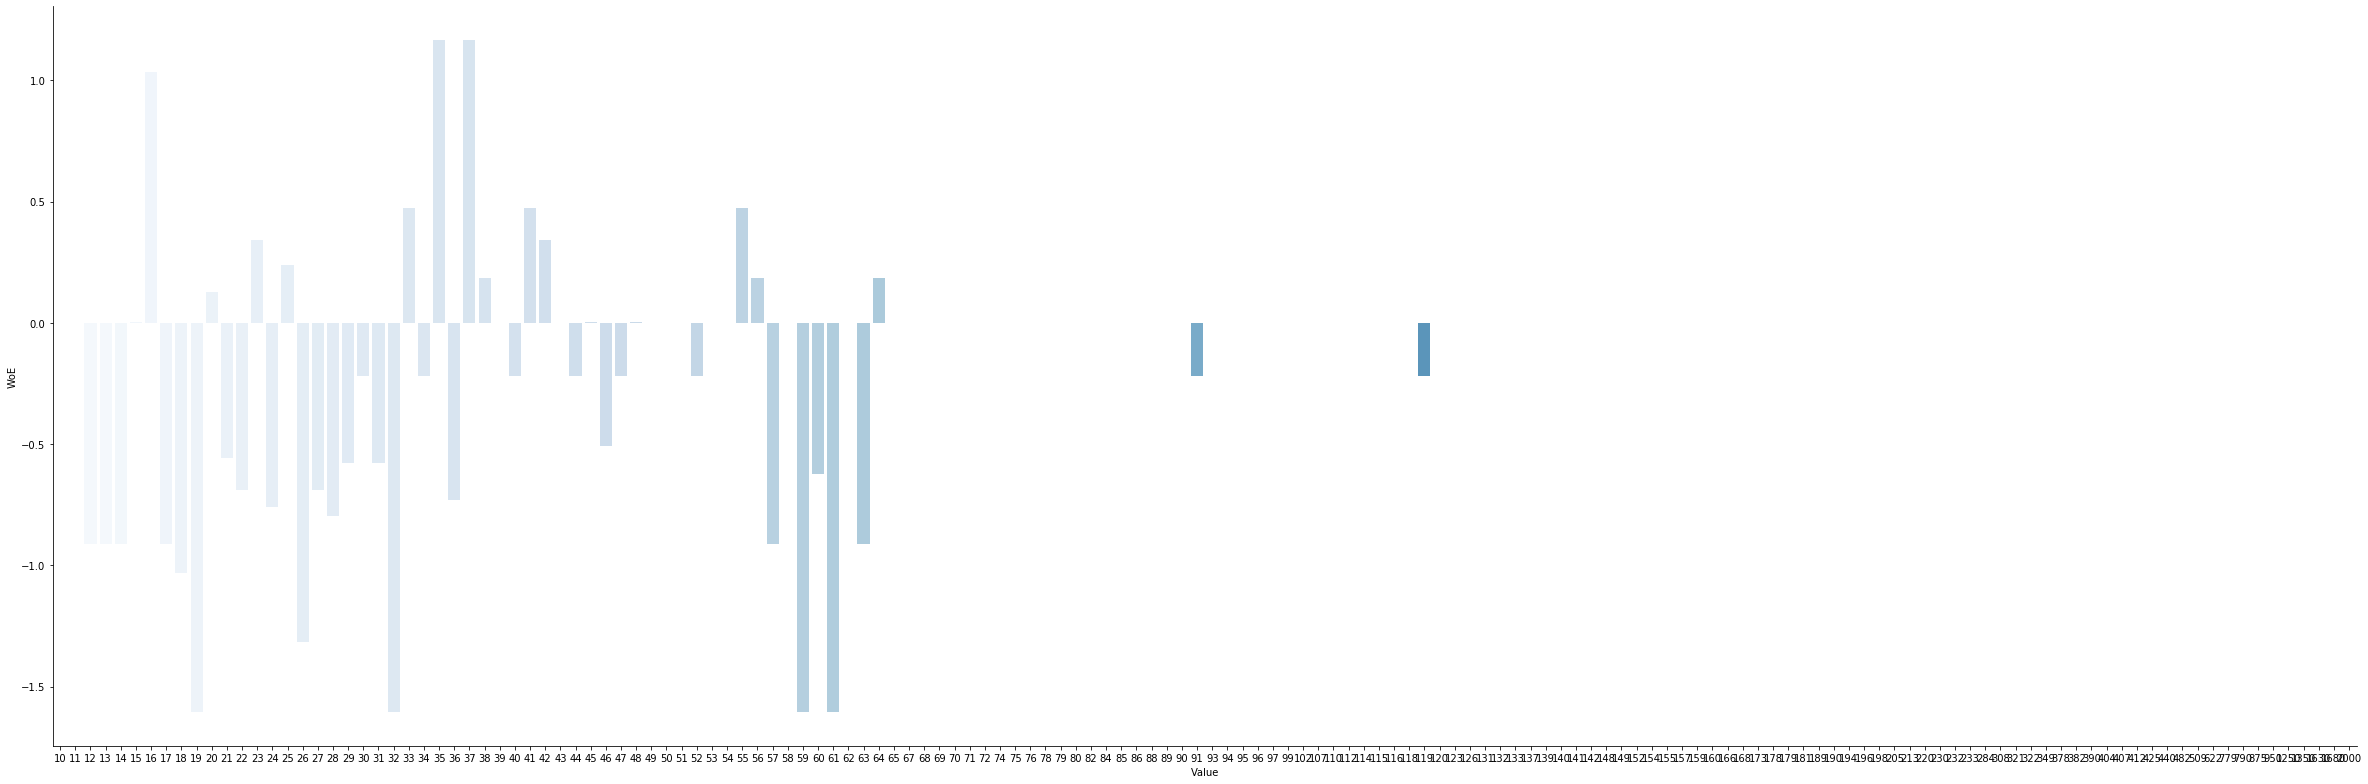

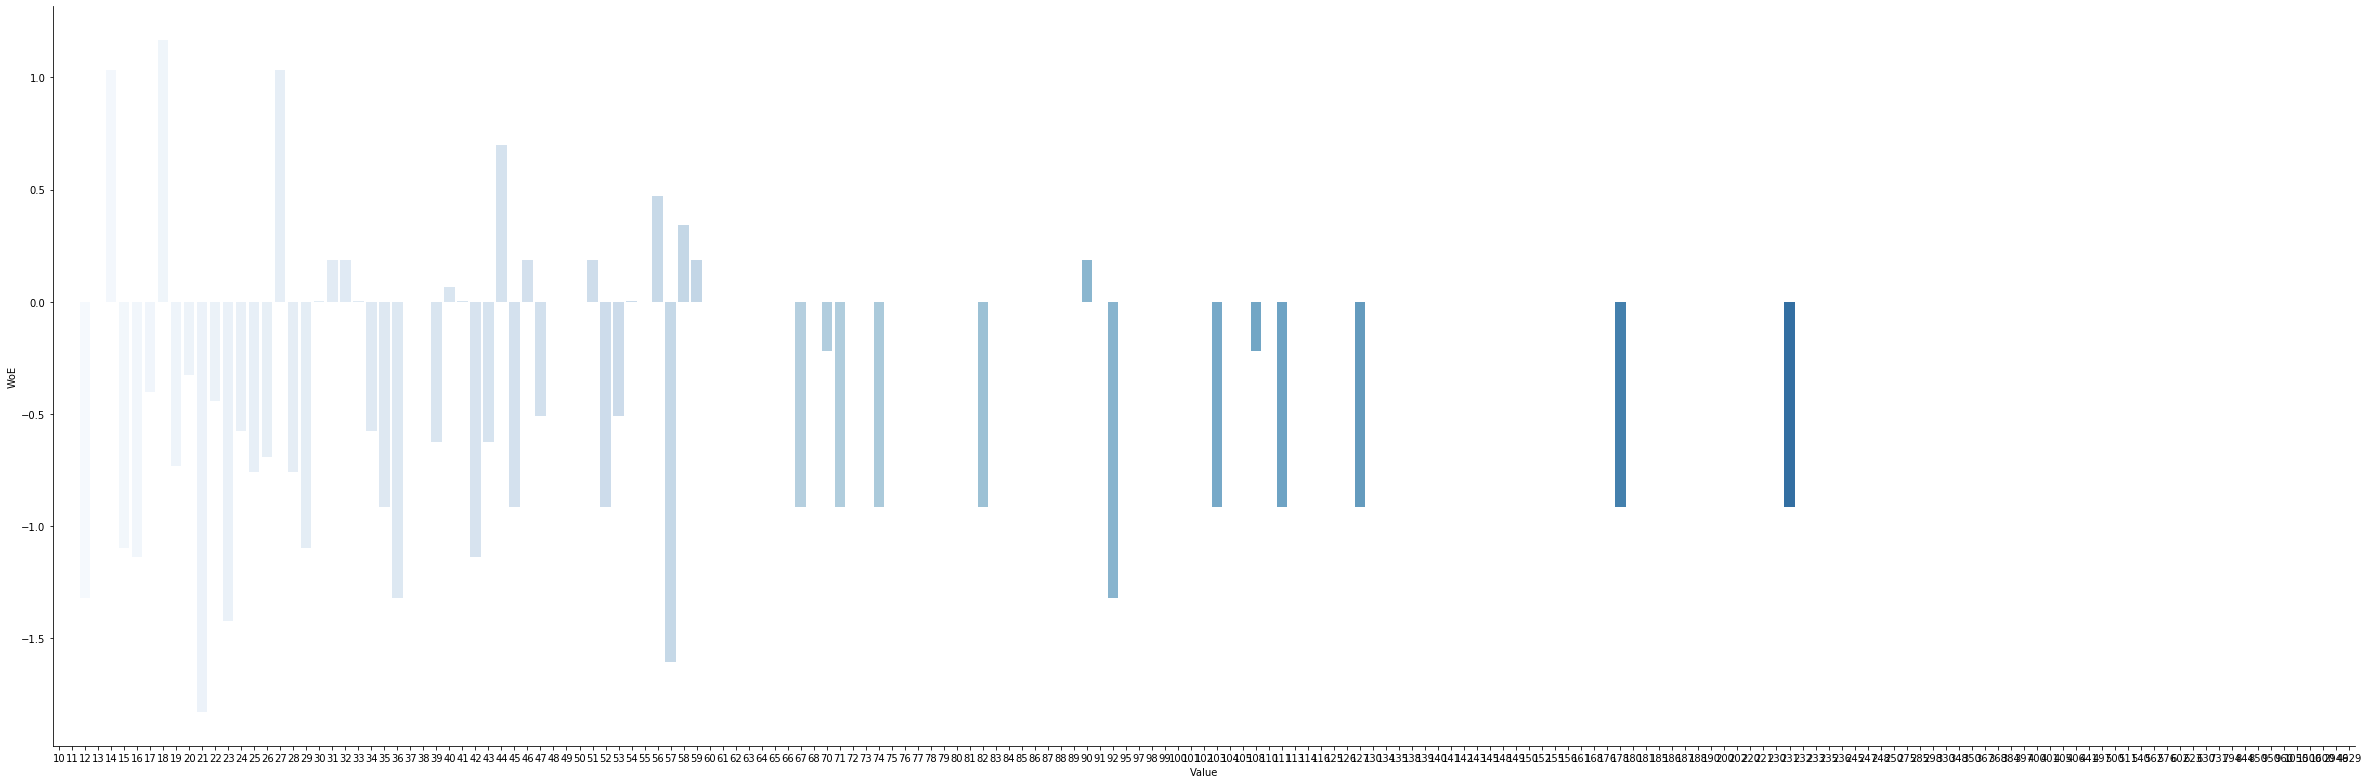

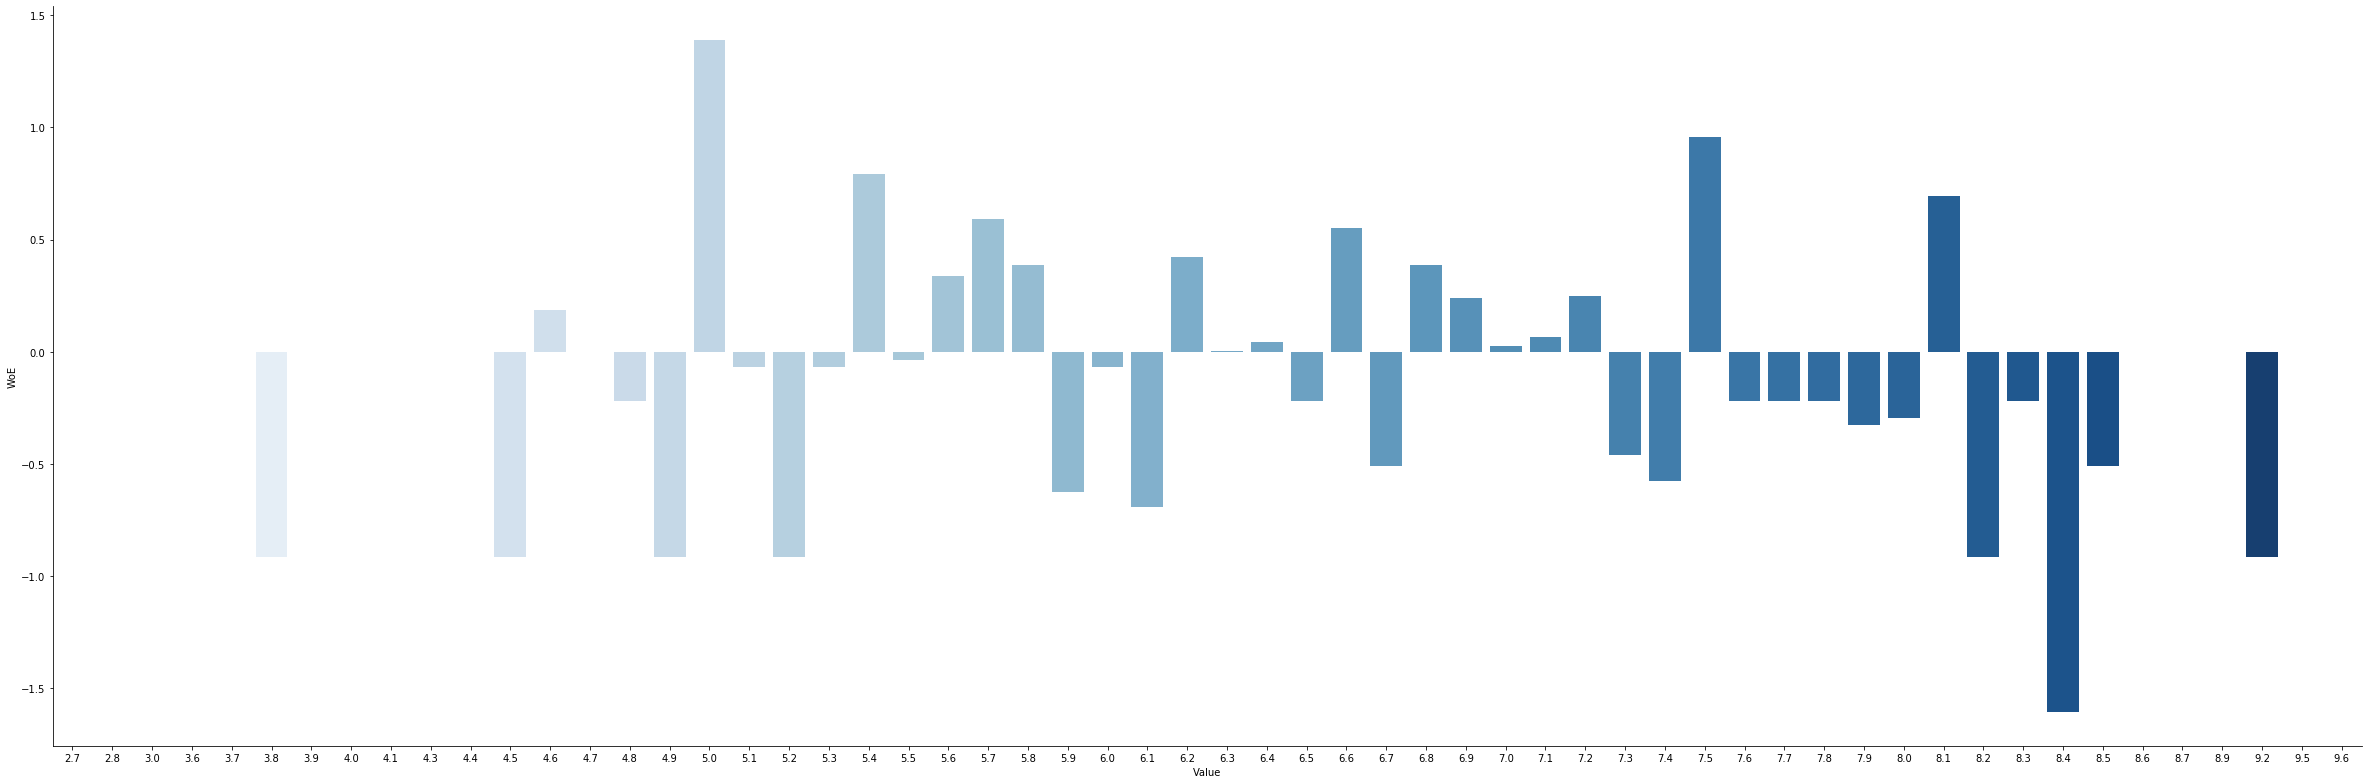

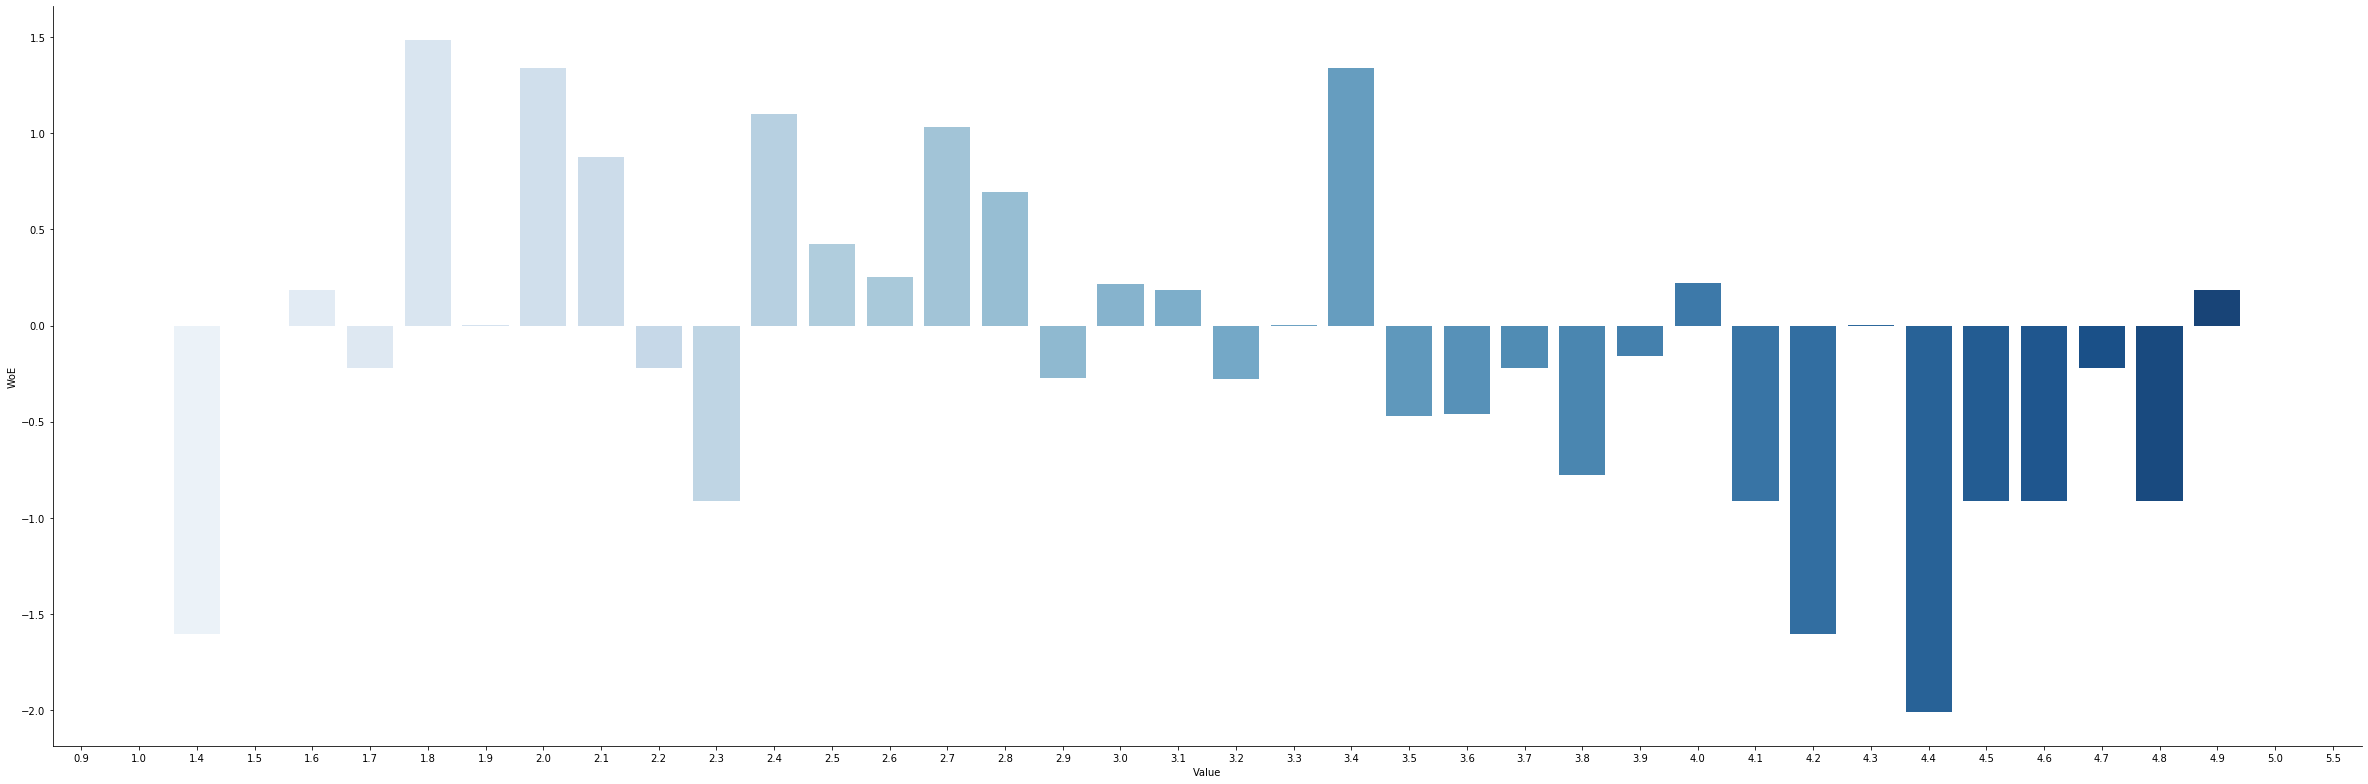

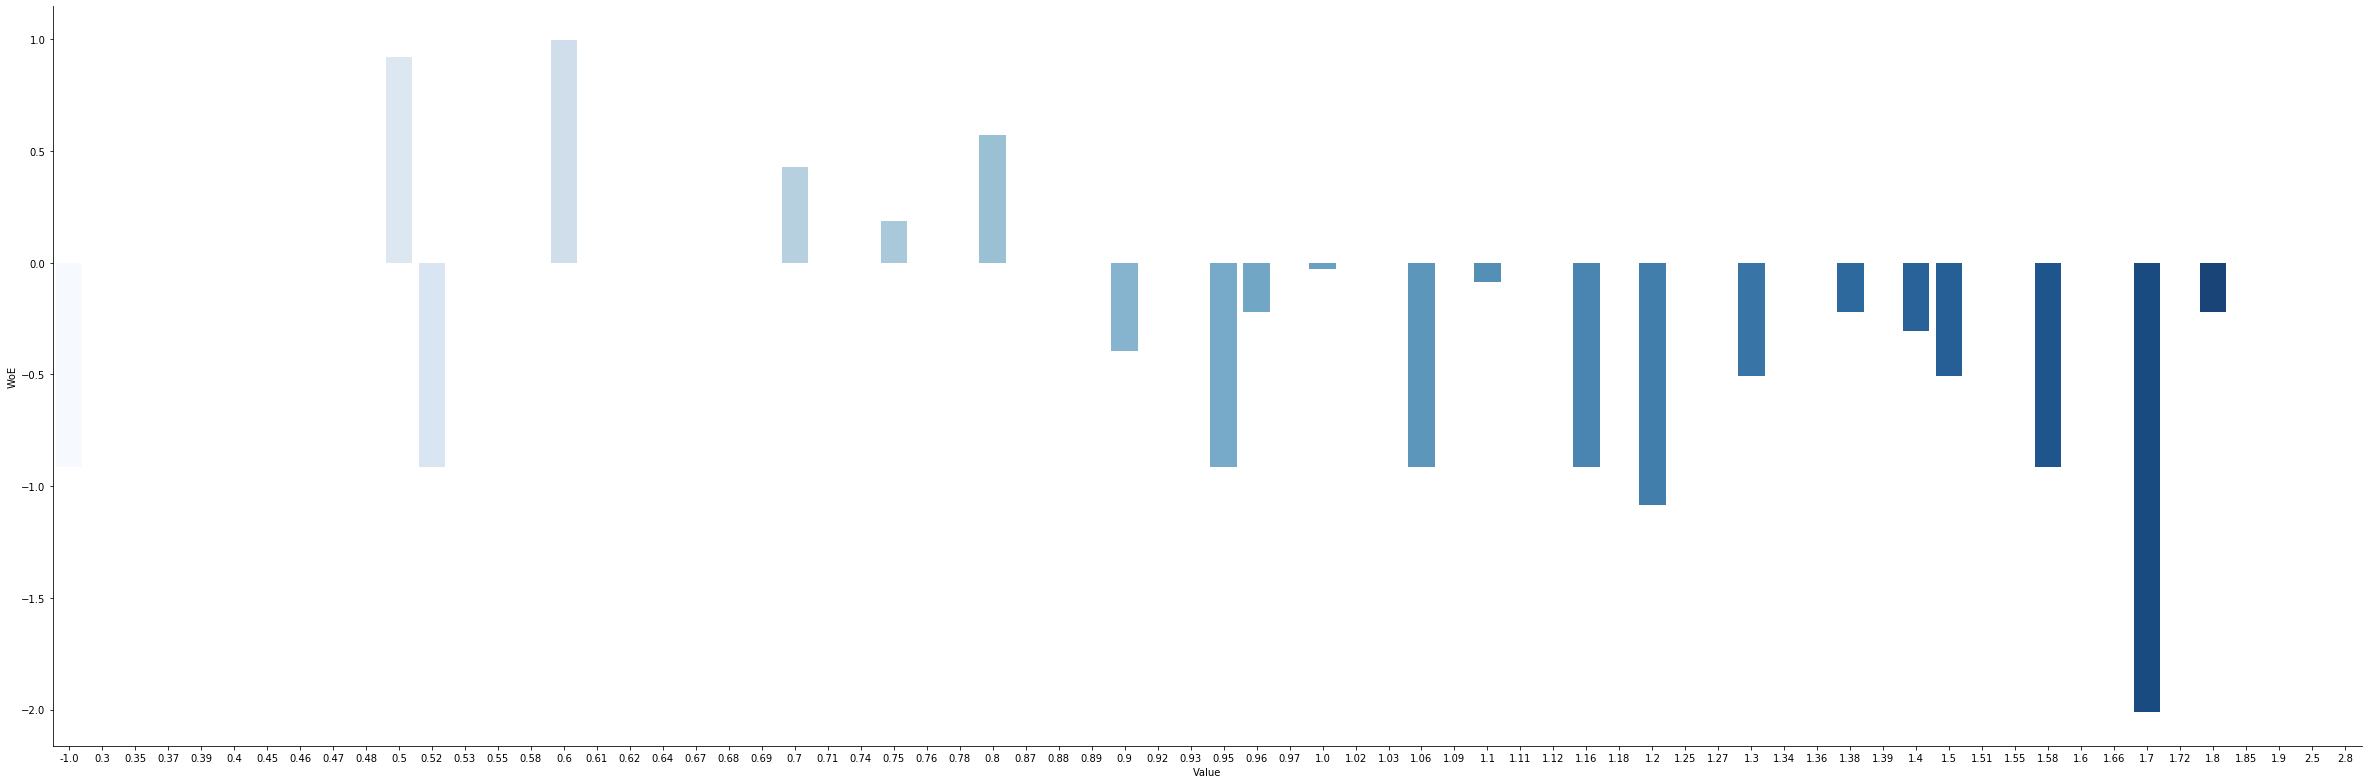

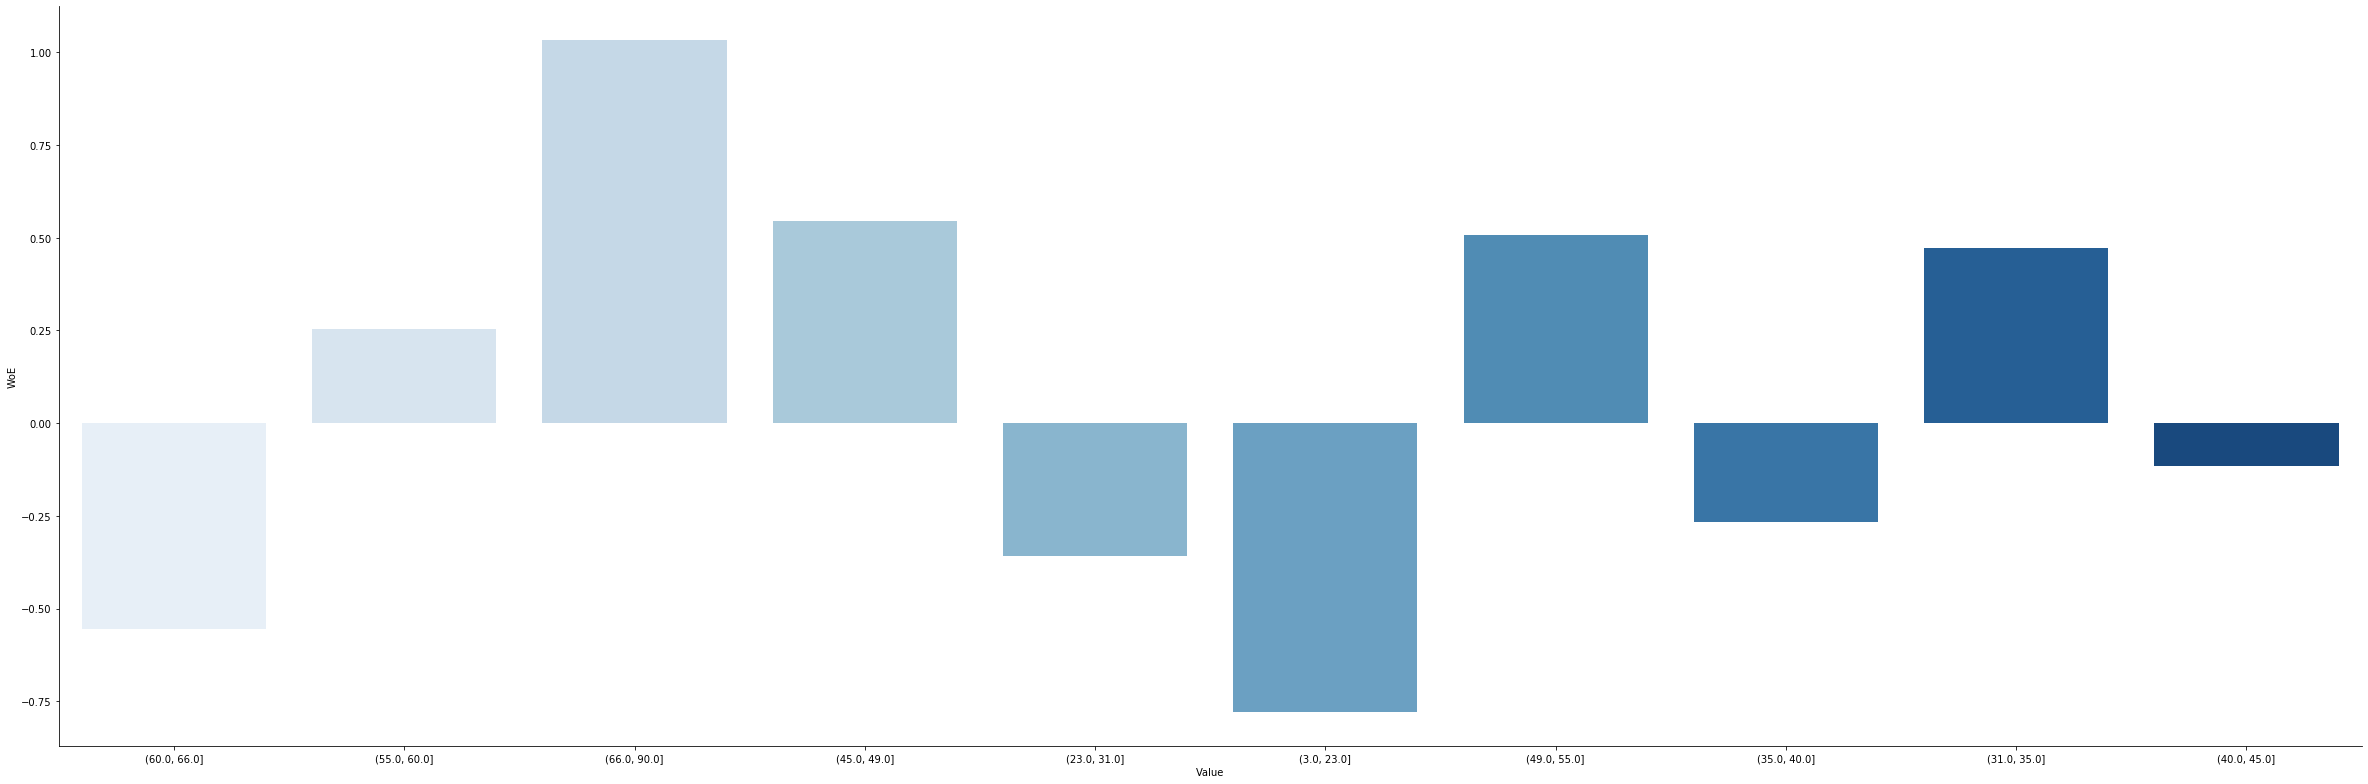

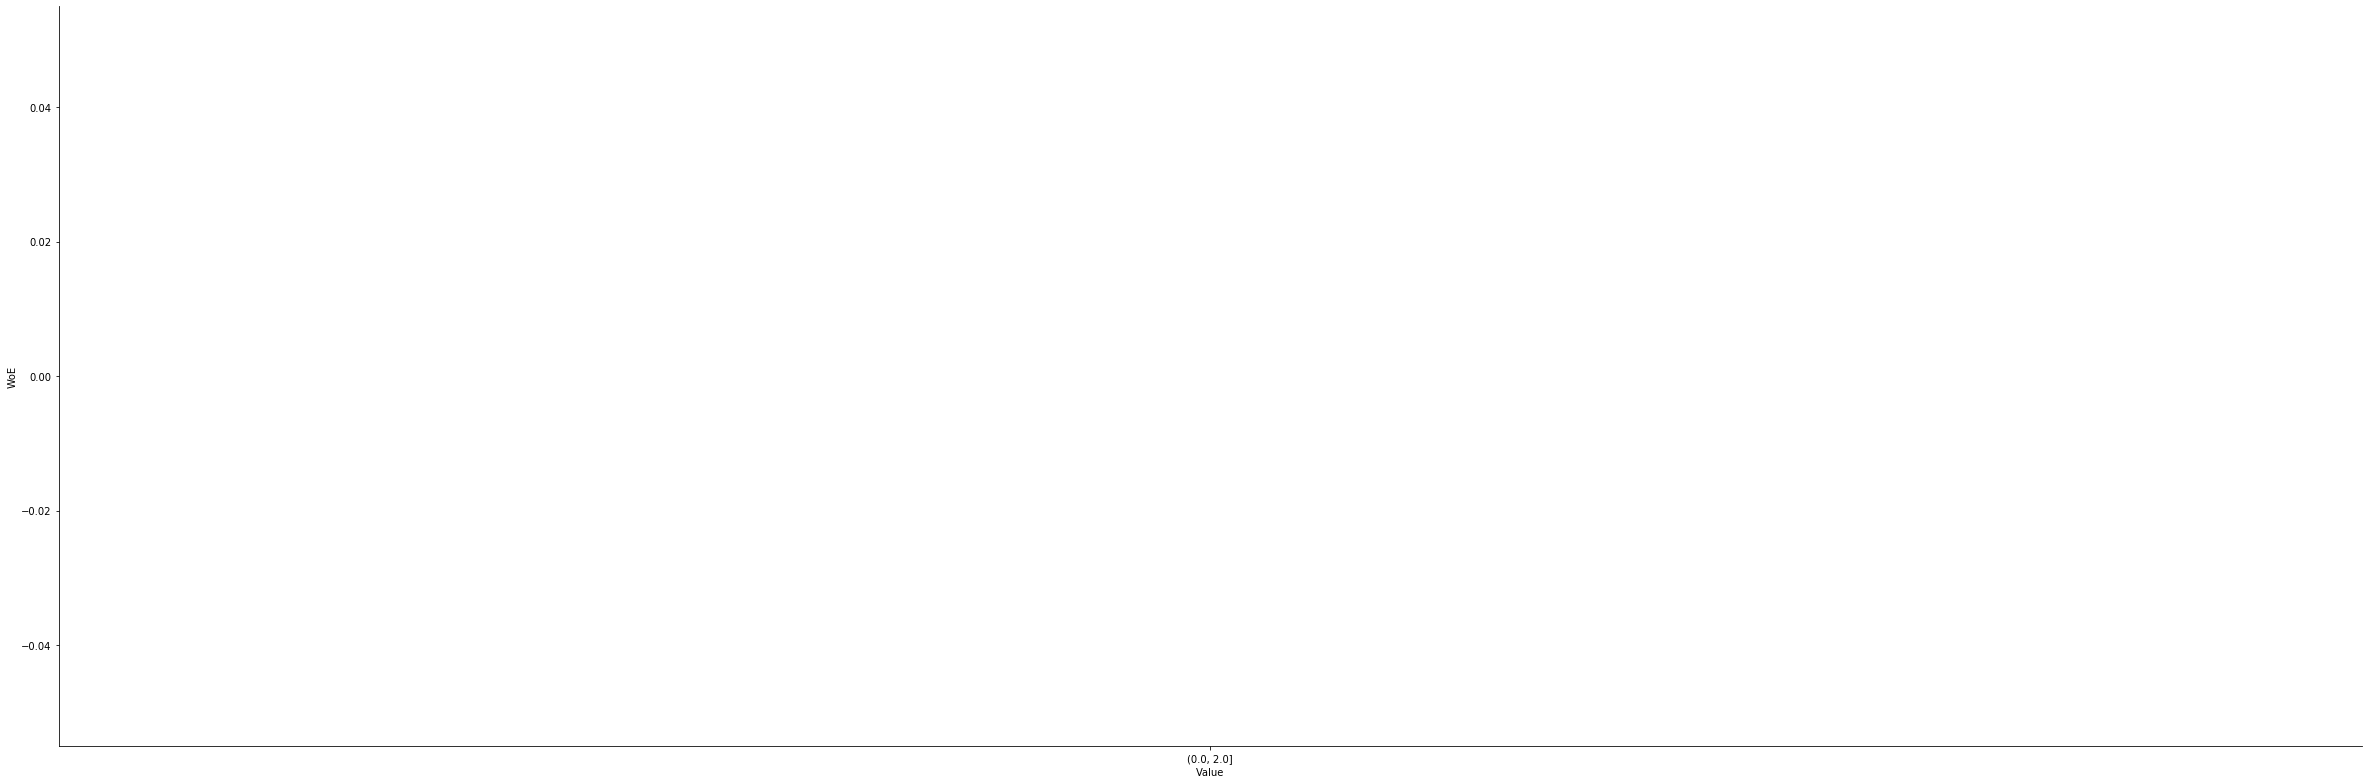

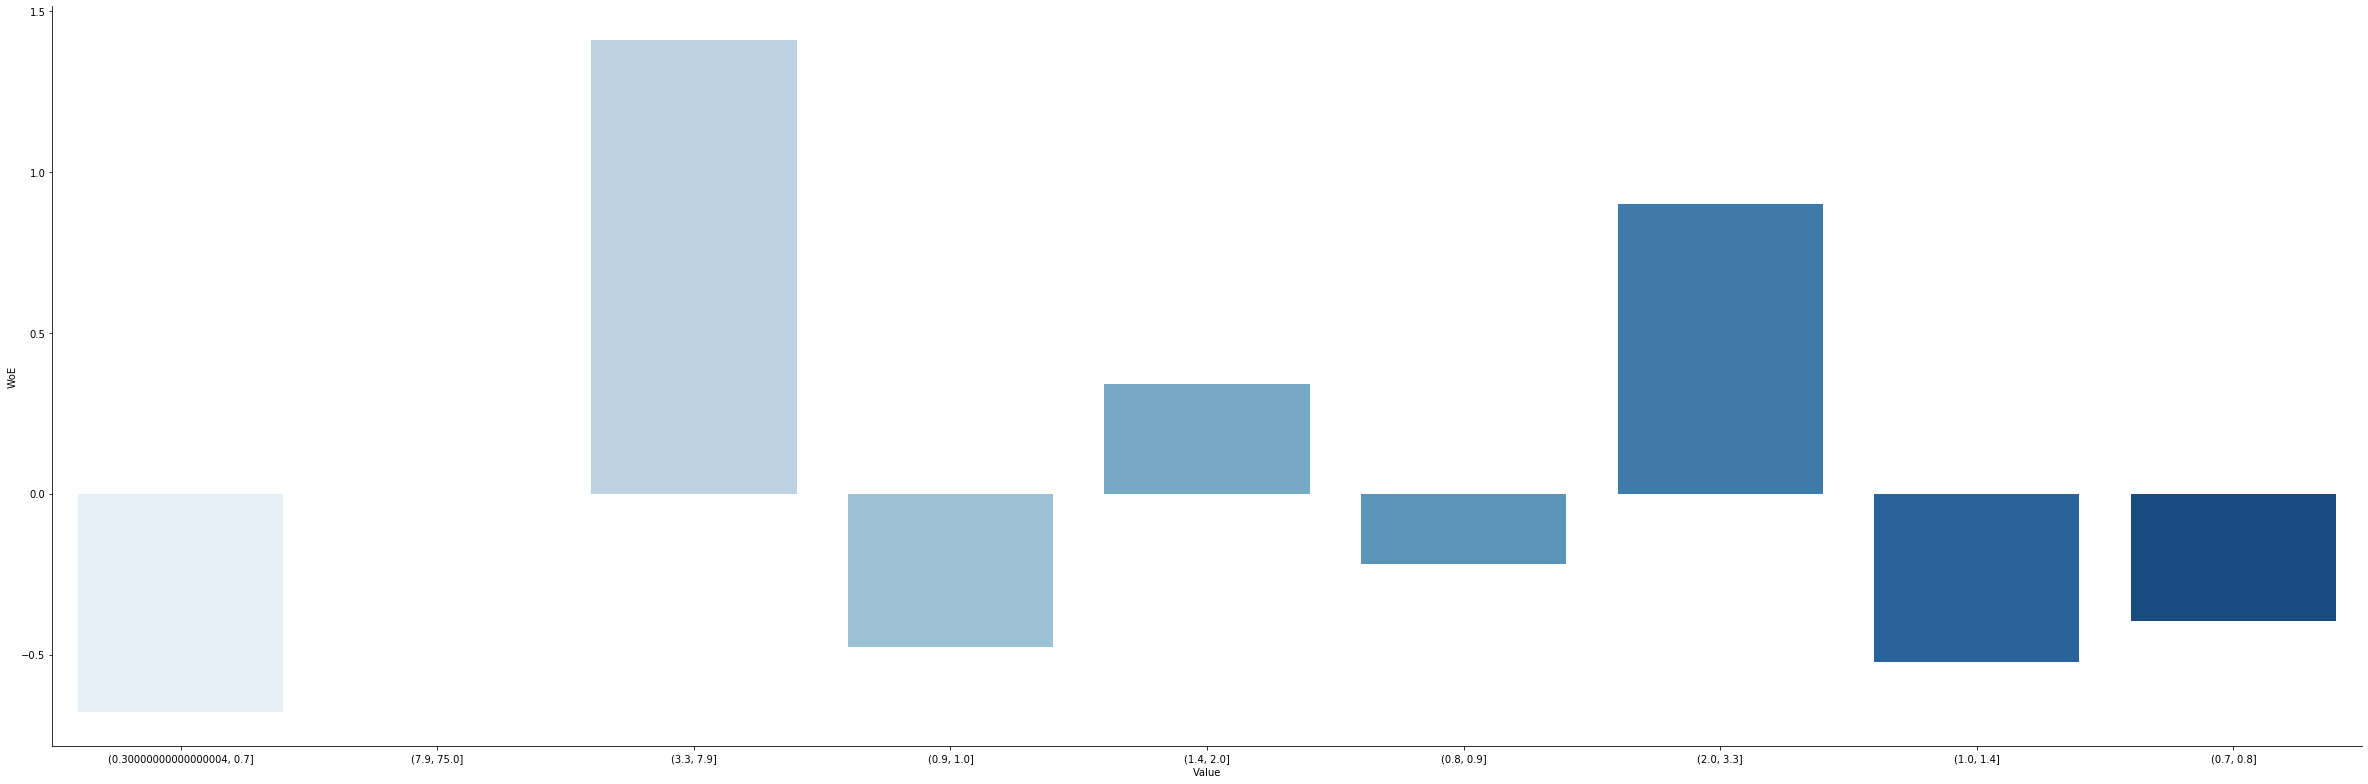

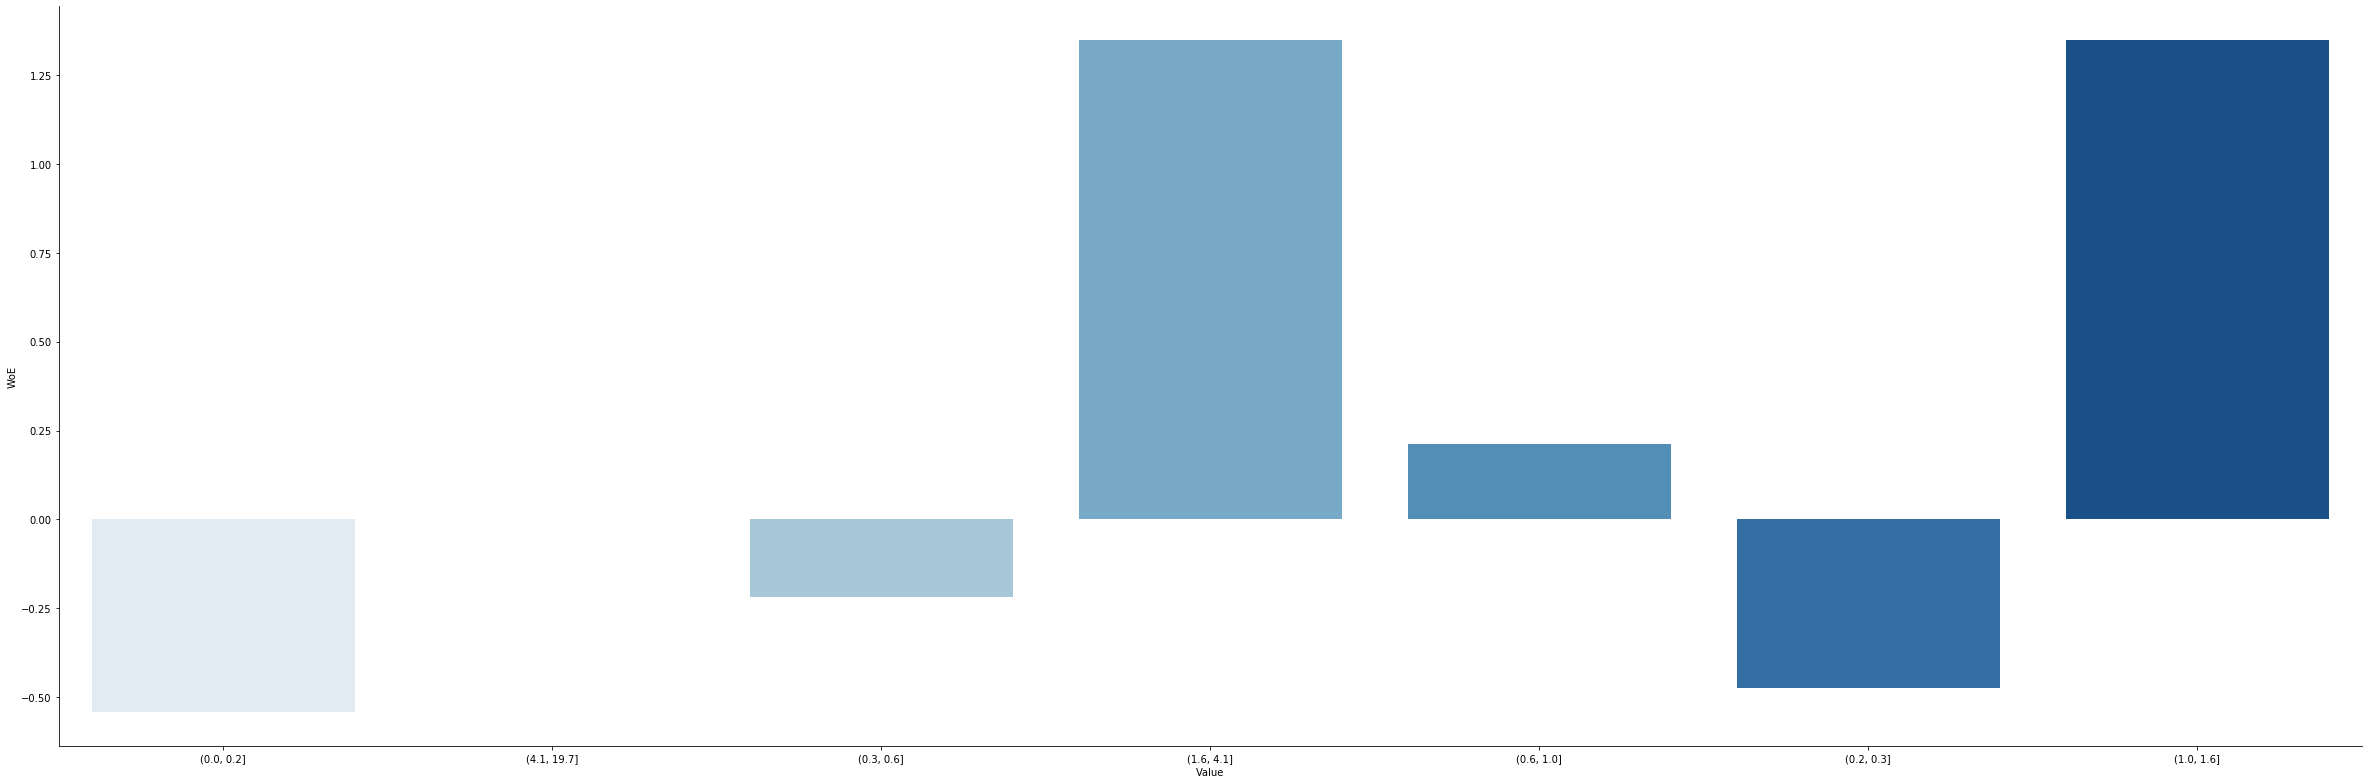

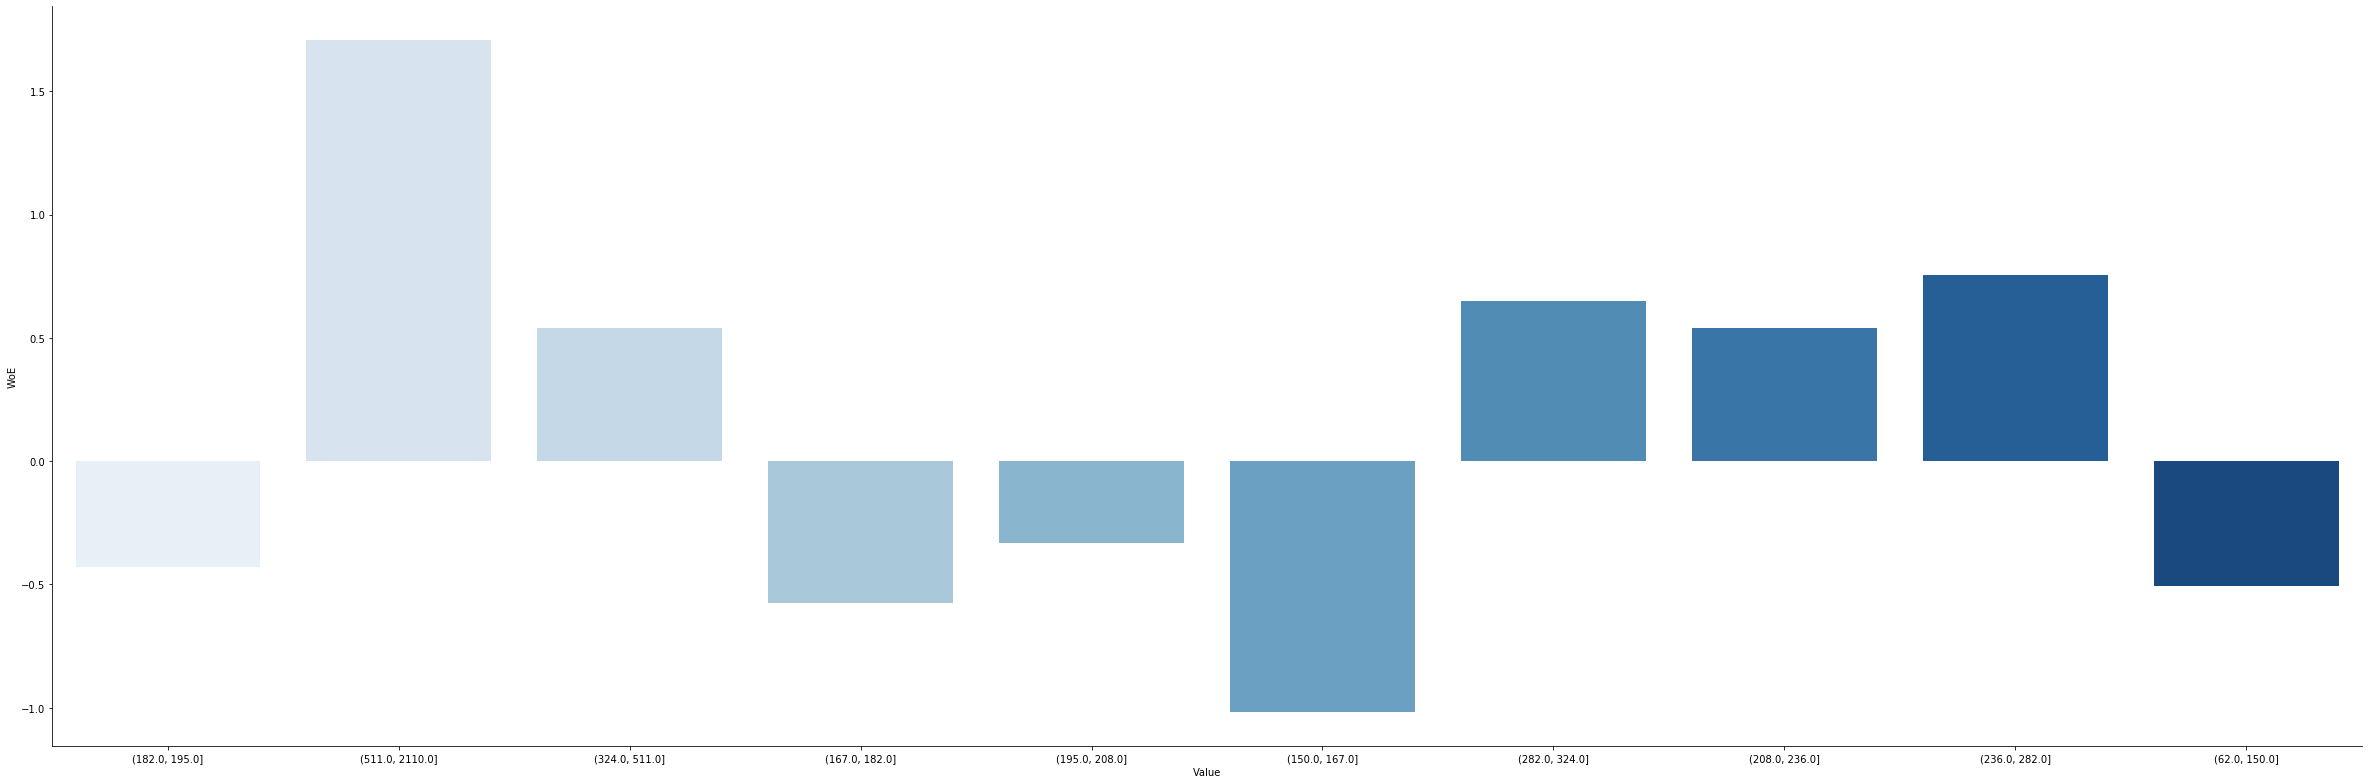

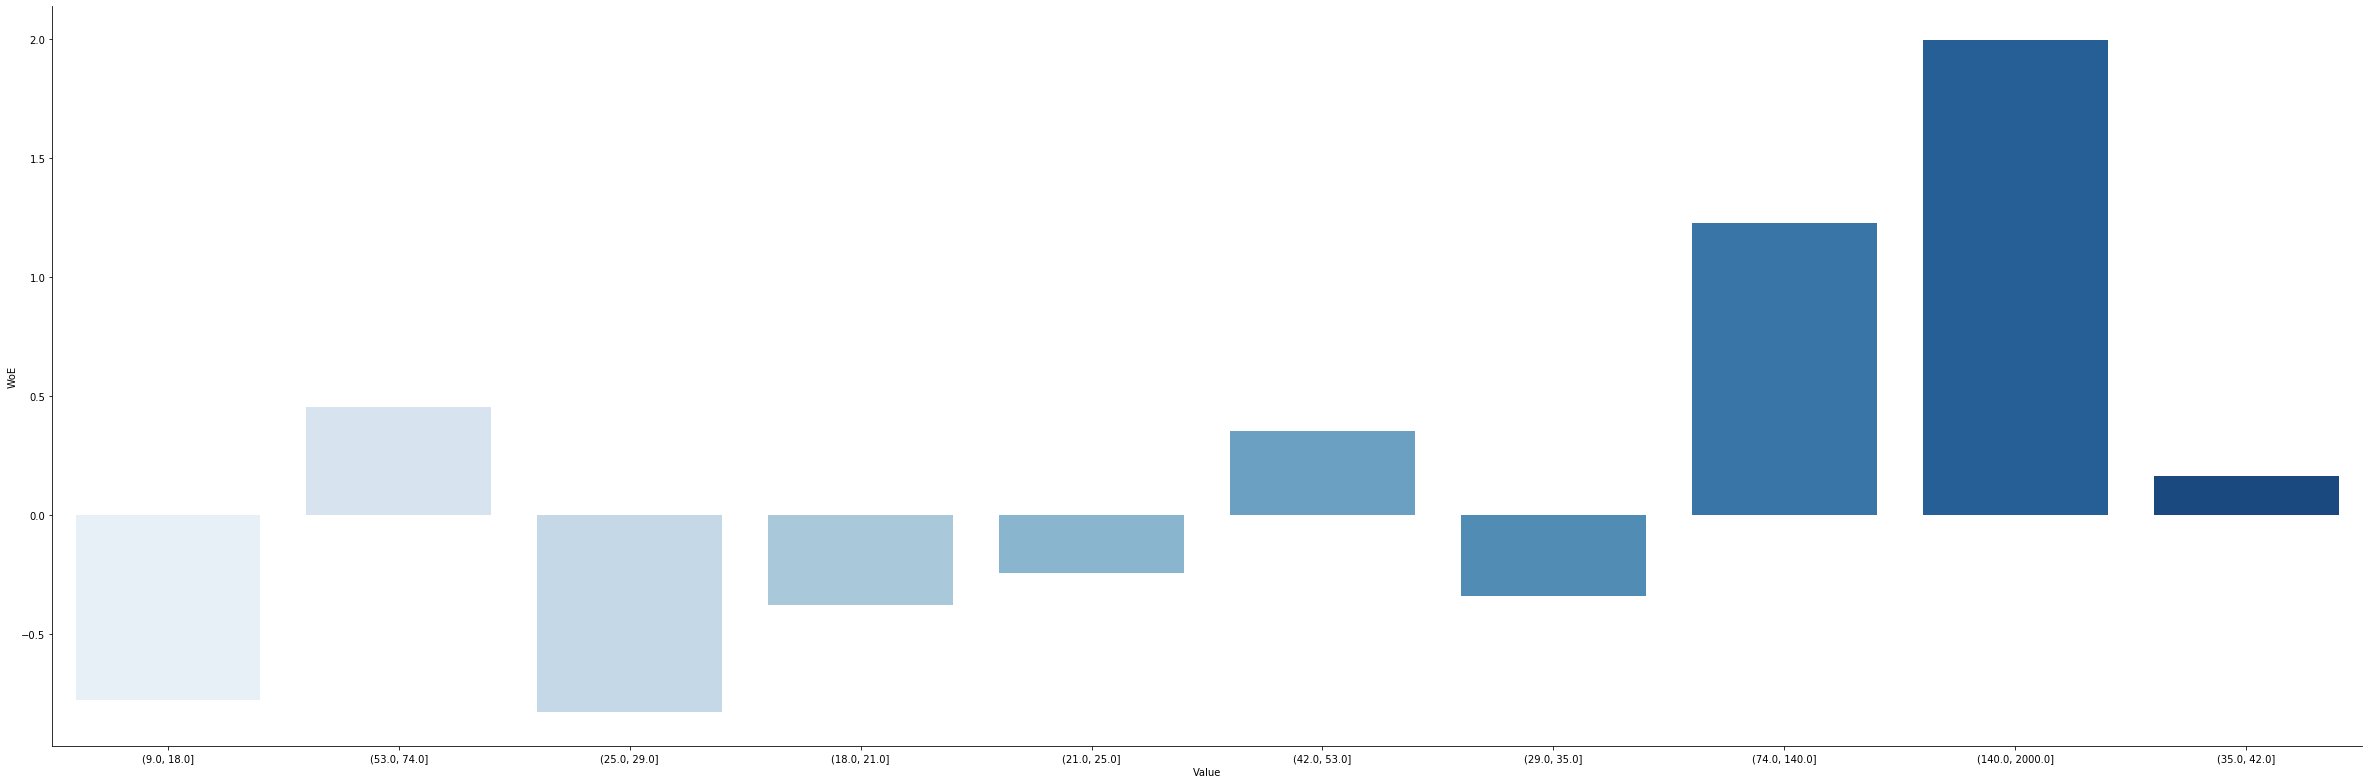

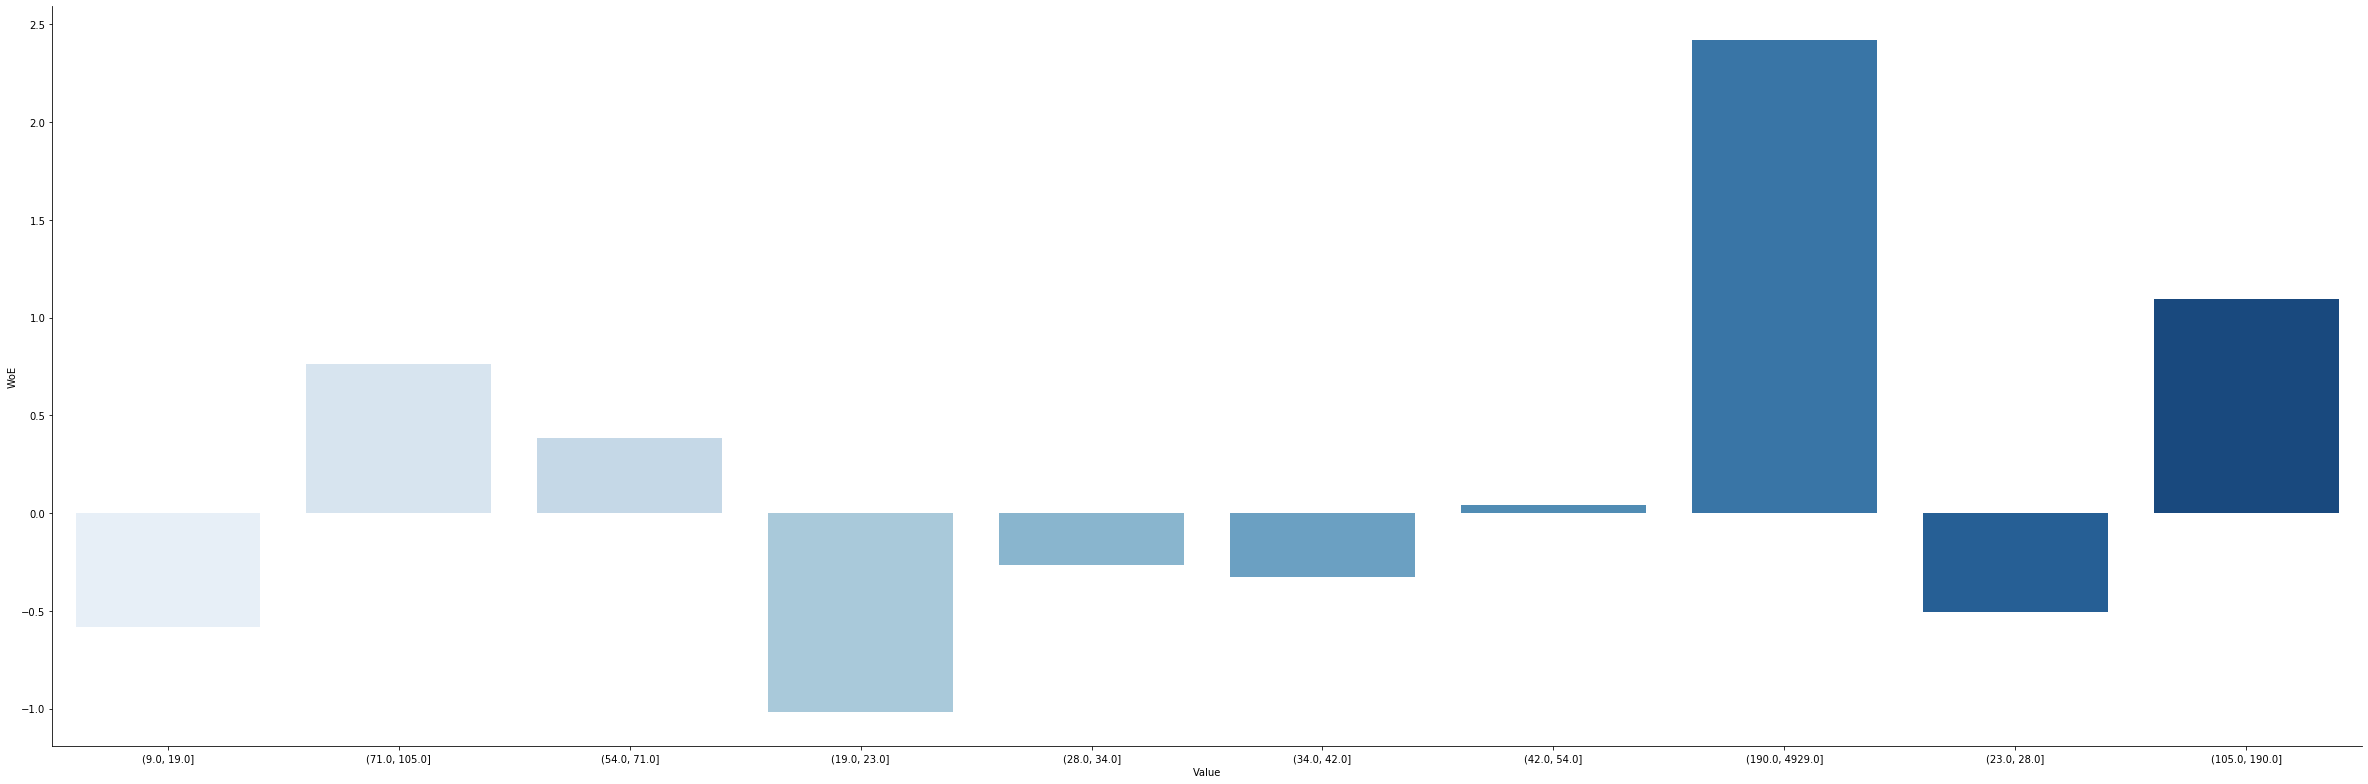

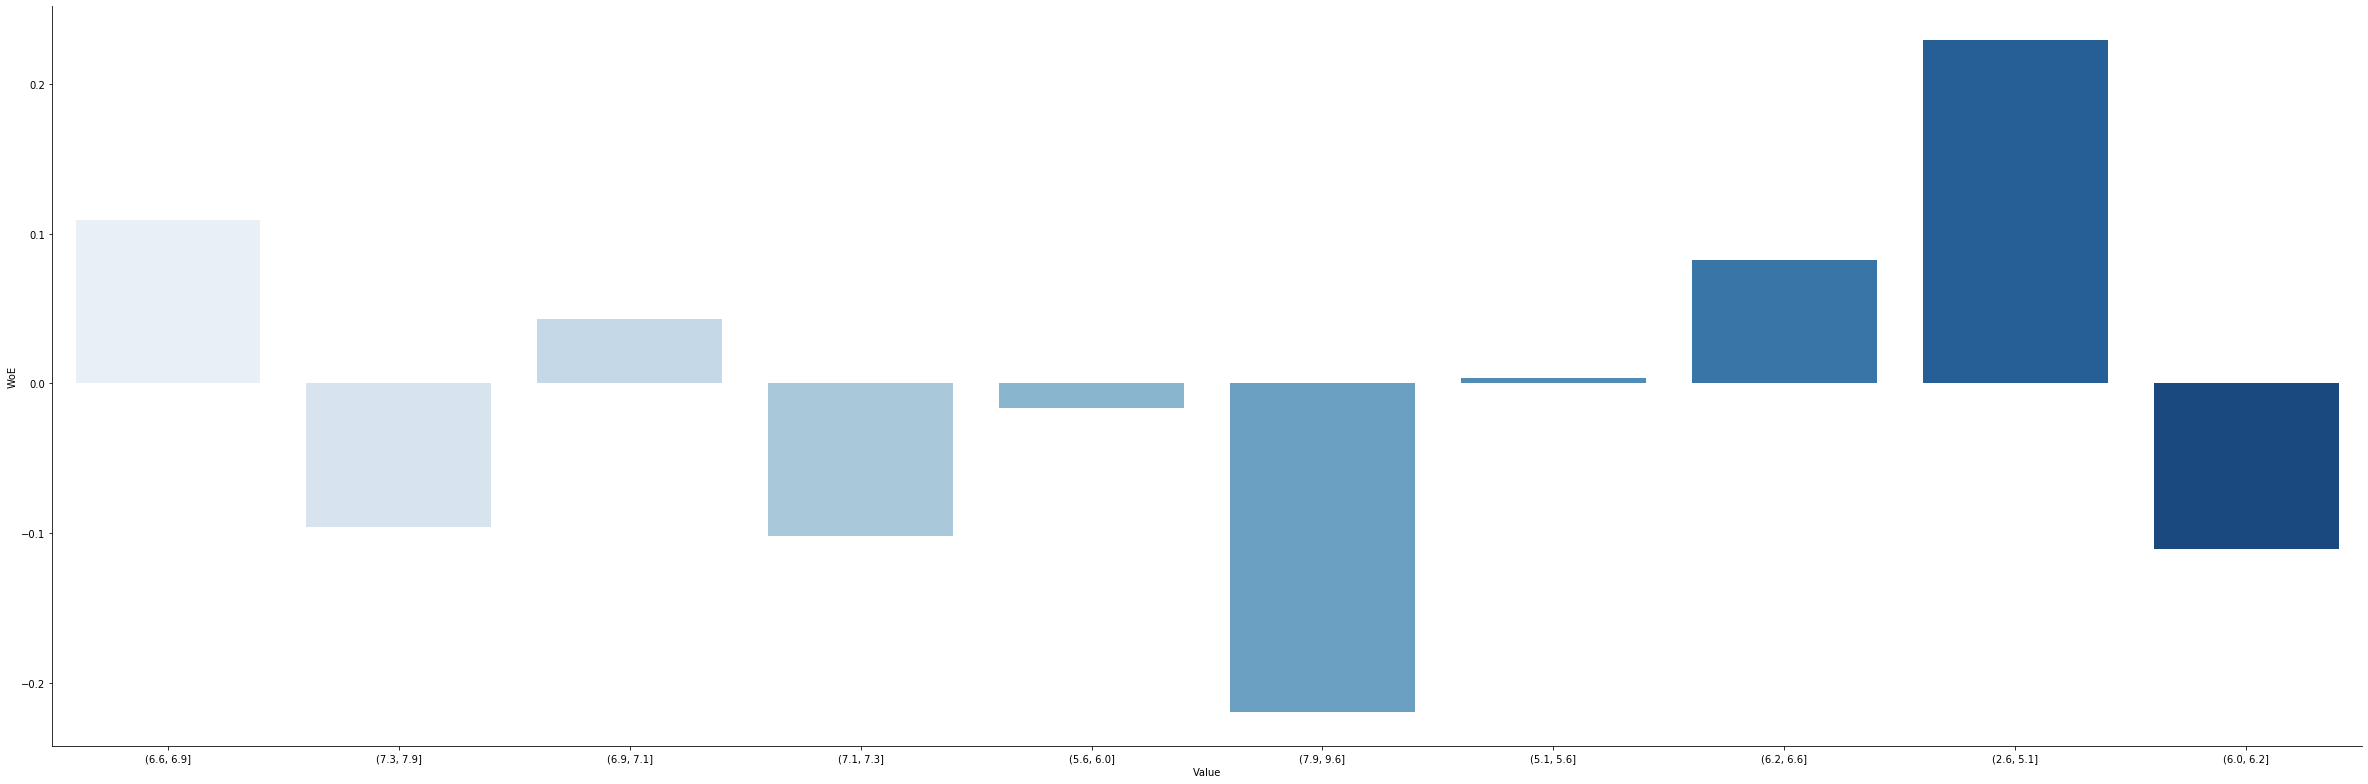

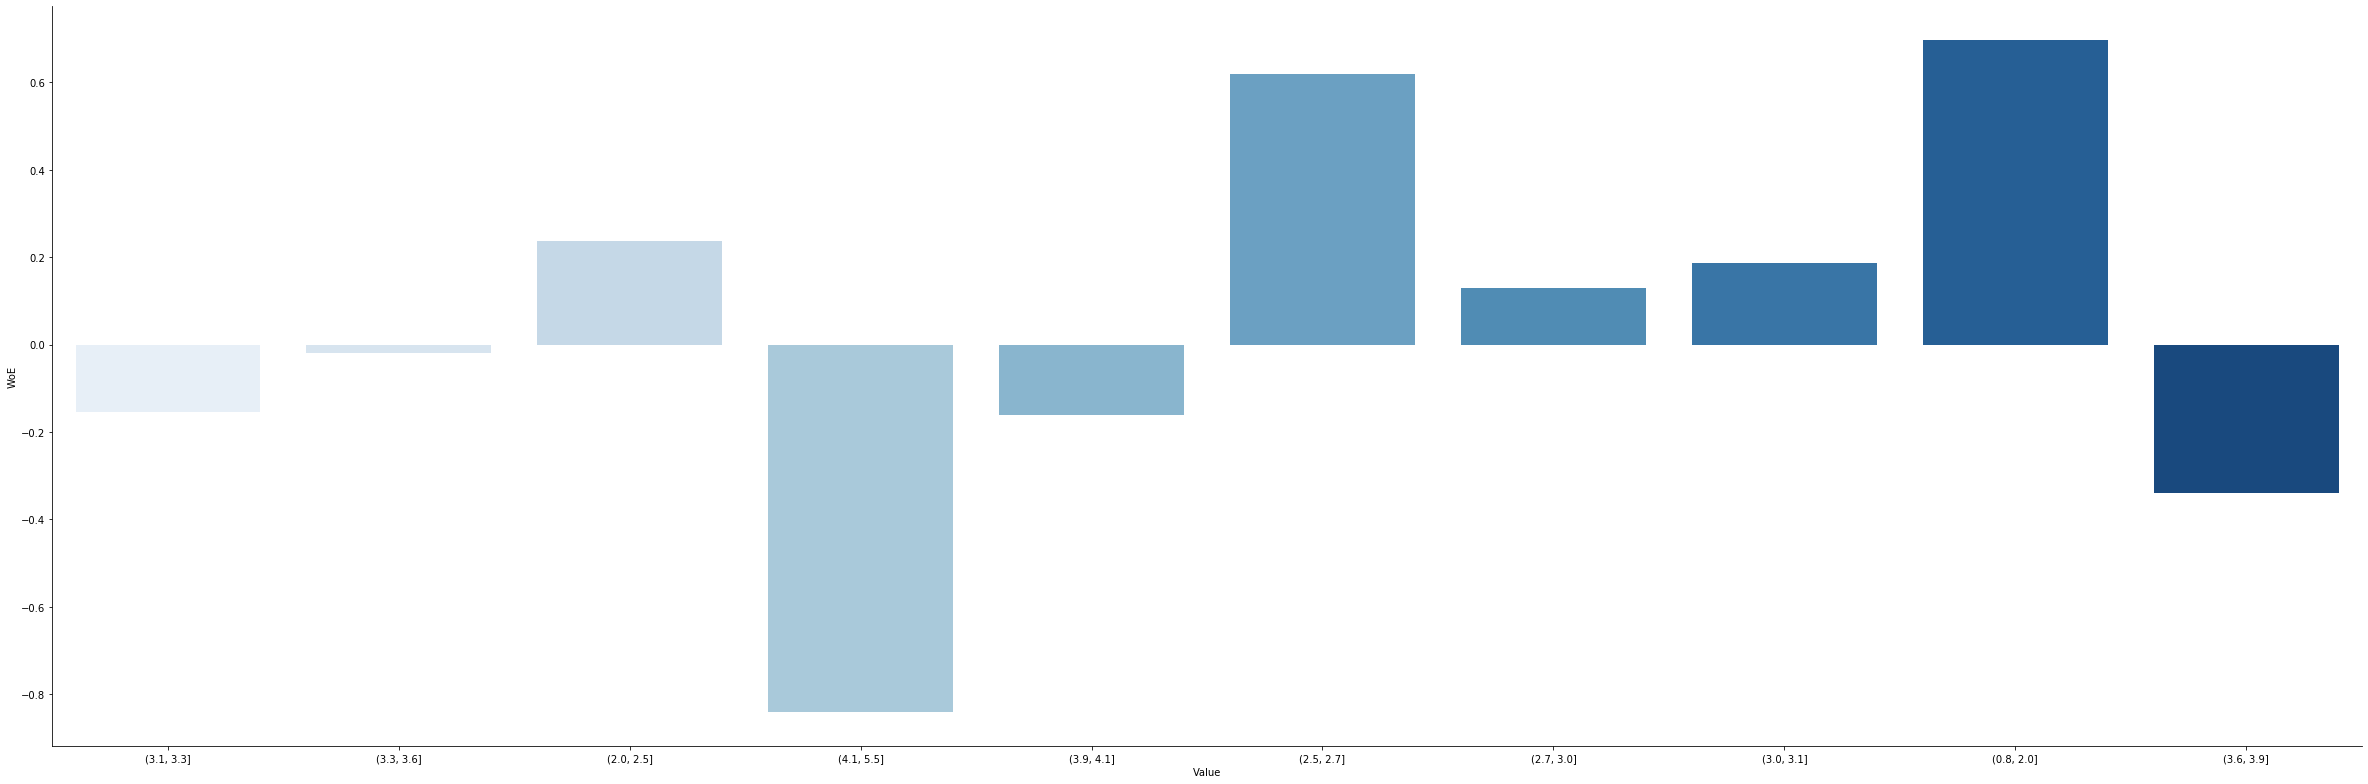

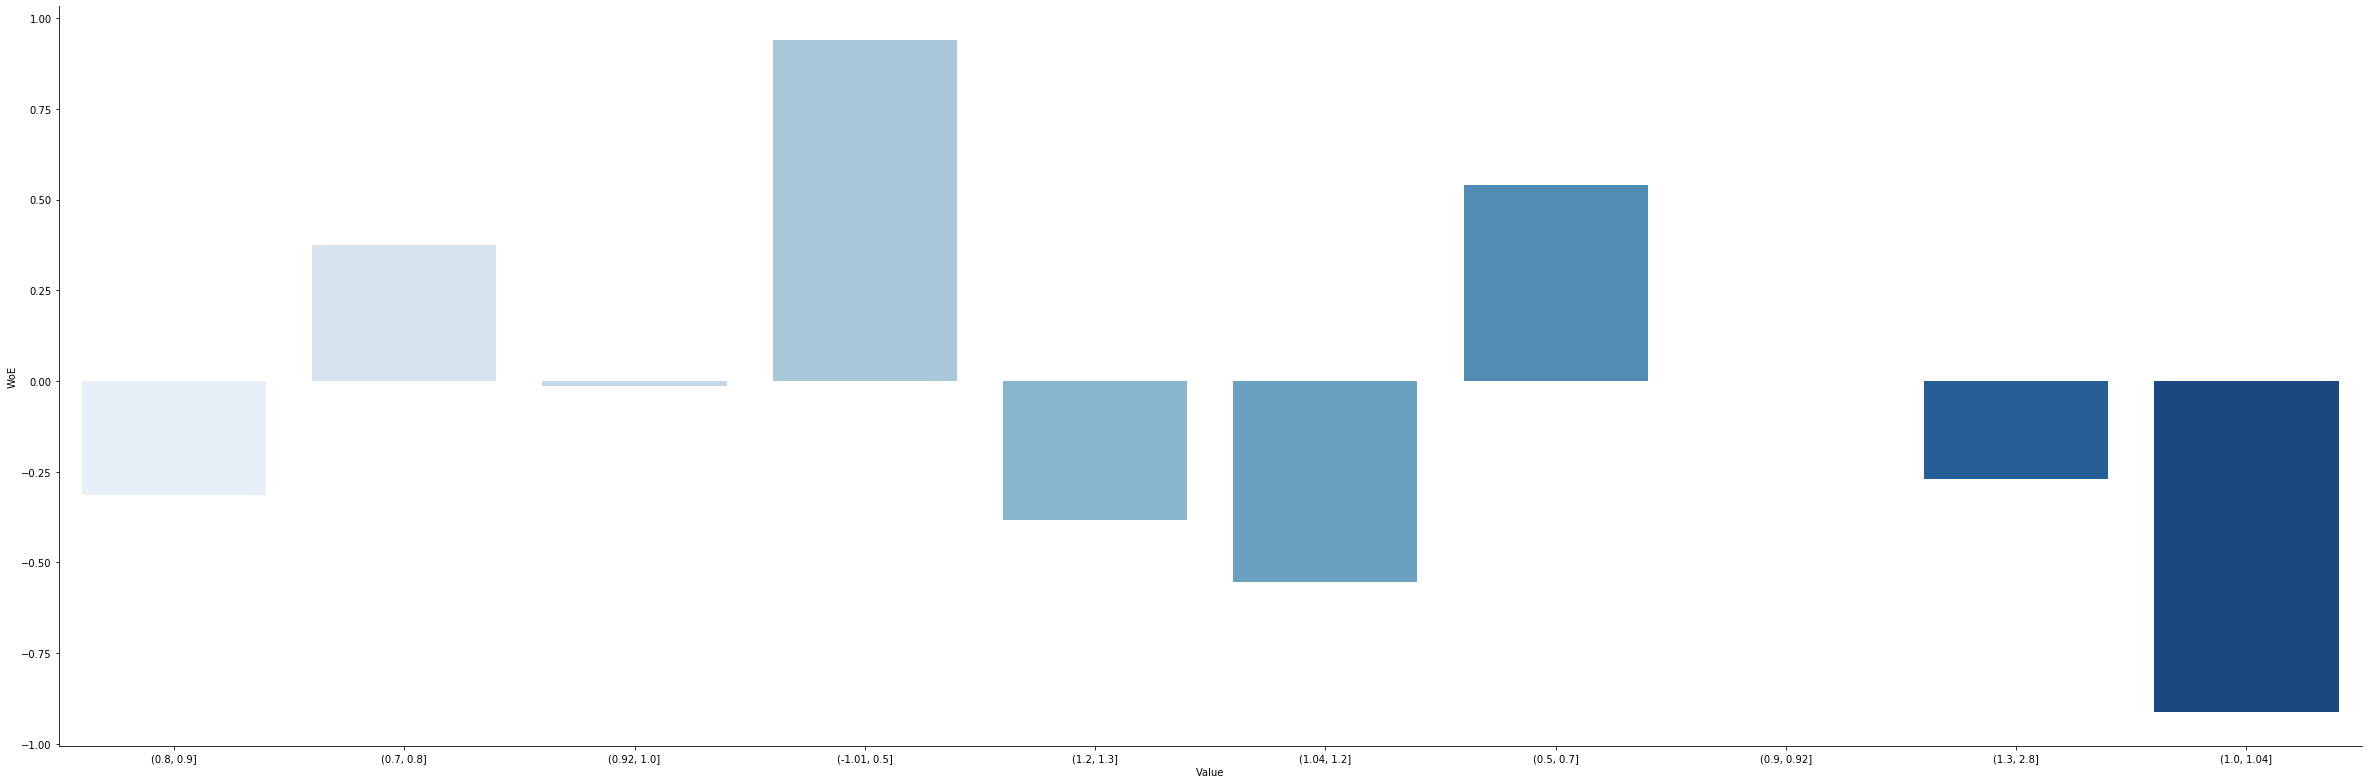

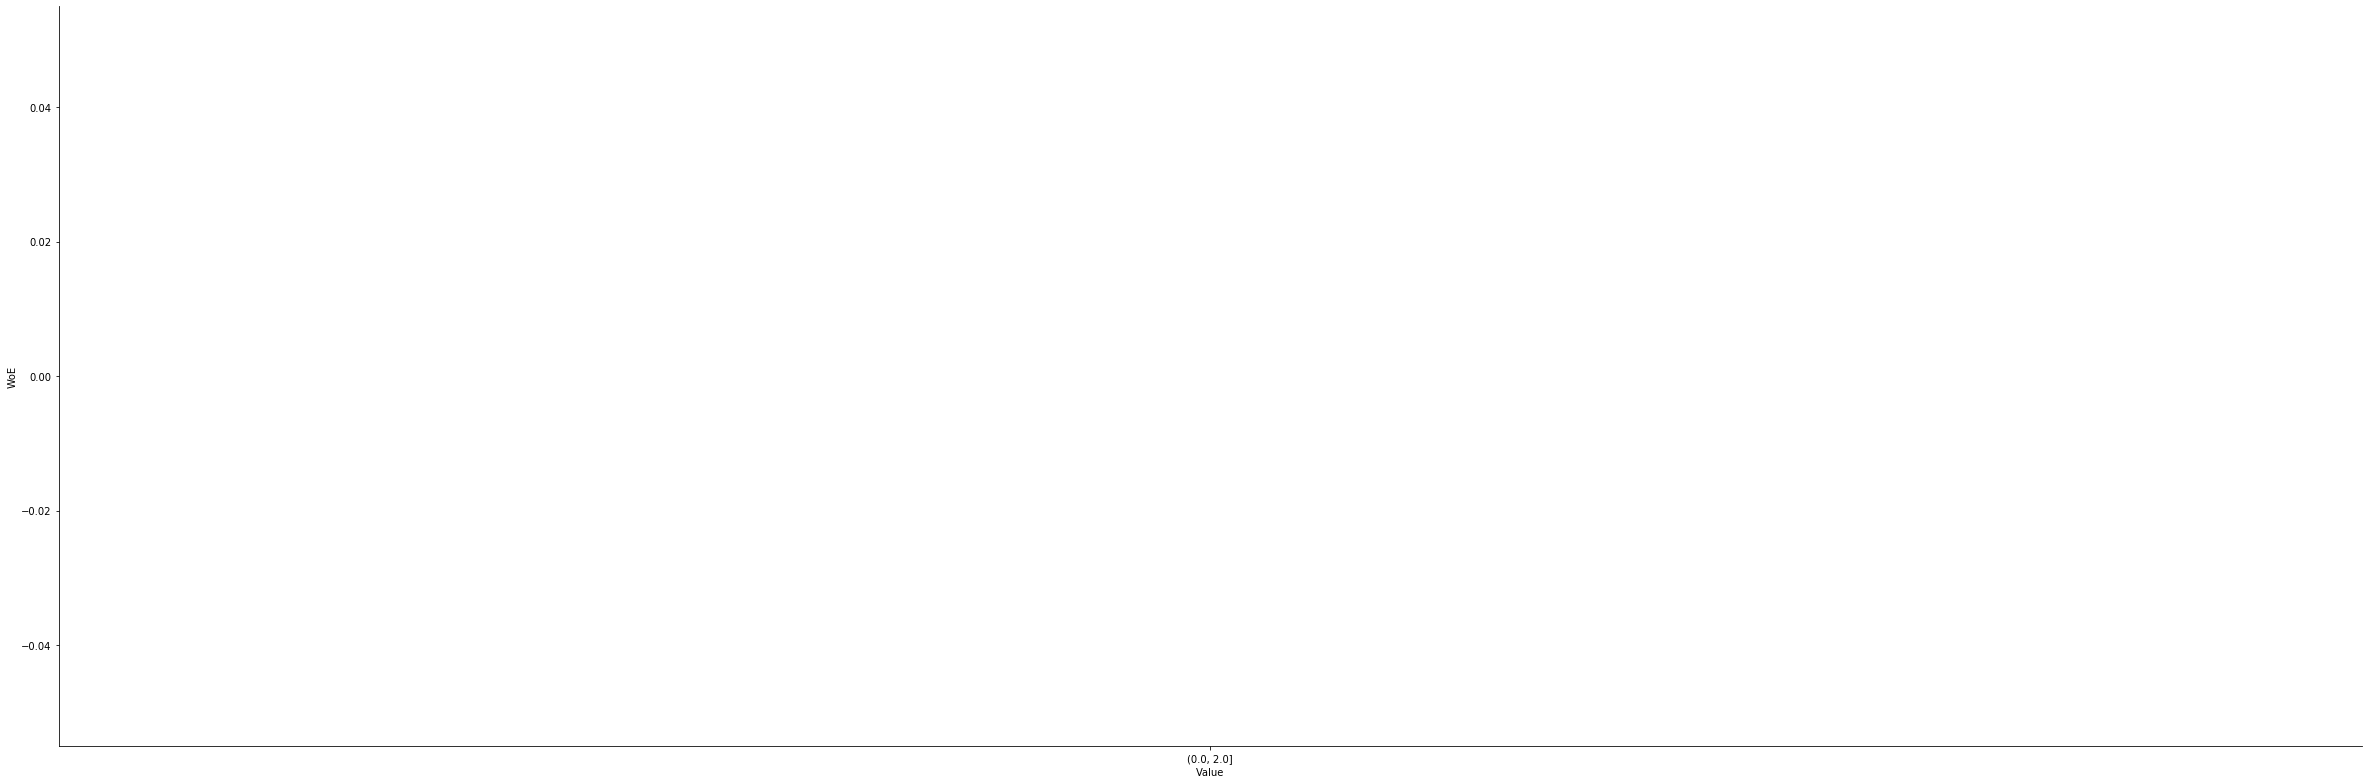

In [33]:
for col in cat_df:
    if (col == 'selector') and ('bin' not in col) : continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df2, iv = woe_iv_calculation(cat_df, col, 'selector')
        print(df2)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

In [34]:
#Information value za pojedine varijable govori koliki one imaju predictive power. 
#Za varijable koje imaju IV:

# <0.02 se kaže da su beskorisne za predikciju, 
# od 0.02 do 0.1 su slabi prediktori, 
# 0.1 do 0.3 su srednji prediktori, 
# od 0.3 do 0.5 su jaki prediktori, 
# a preko 0.5 su vrlo snažni prediktori za koje se govori da su 'too good to be true' 
# ili da varijablu treba provjeriti jer je sumnjiva


In [35]:
# Information values

# age: 0.72 - strong (cak mozda i presnazan predictor - sumnjivo?)
# gender: 0.03 - weak
# total_bilirubin: 0.26 - medium
# direct_bilirubin: 0.26 - medium
# total_protein: 0.48 - strong
# albumin: 0.41 - strong 
# ag_ratio: 0.53 - strong (sumnjivo?)
# sgpt: 0.23 - medium
# sgot: 0.48 - strong
# alkphos: 0.29 - medium

# Information value za najjače varijable - binnane

# age_bin: 0.27 - medium
# total_protein_bin: 0.53 - strong
# albumin_bin: 0.55 - strong
# ag_ratio_bin: 0.65 - strong
# sgot_bin: 0.17 - medium

# Iz ovoga se može vidjeti da na predikciju najviše utječu varijable total_protein, albumin i ag_ratio
# varijable age i sgot, nakon binanja se vidi da su nestabilne zbog velike promjene information valuea, te se 
# zato neće uzimati za analizu
# može se zaključiti da što je veća vrijednost ovih varijabli, odnosno što one više odstupaju od standardnih vrijednosti
# to će biti veća vjerojatnost za dobivanje bolesti jetre, pa tako što je veća vrijednost total_proteina, odnosno iznad 500
# ili što je više vrijjednost albumina iznad 250, to će vjerojatnost za dobivanje bolesti biti veća 


In [ ]:
# Stanje kvalitete podataka (data quality)

# podaci su uglavnom potpuni, uz iznimku varijable alkphos koja ima 4 missing vrijednosti, a te se vrijednosti naknadno
# trebalo zamijeniti za daljnju analizu
# u ovom slučaju missing vrijednosti možda ne bi imale veliki impact na krajnji rezultat, no u slučaju da ih je više, to
# bi moglo dovesti do krivih rezultata i posljedično, krivih zaključaka

# u slučaju da se radi o drugačijem datasetu, npr. prodaji određenih dobara, kada bi bilo missing ili krivih vrijednosti
# za npr. adresu korisnika, to bi moglo rezultirati neisporukom ili pogrešnom isporukom robe, što šteti poduzeću

# podaci su također u validnom formatu, odnosno za npr varijablu gender, sve vrijednosti su ili Male ili Female, 
# bez pogrešnih unosa, što pridonosi ispravnoj analizi kasnije 
# također, format podataka u pojedinoj koloni je ispravan, pa je tako varijabla age string, 
# dok su ostale varijable numeričke, integer ili float, ovisno o kojoj se varijabli radi
# s obzirom da se radi o medicinskim podacima tj. numeričkim vrijednostima relevantnih medicinskih obilježja
# postoji velik broj unique podataka, što pridonosi data qualityju
# naravno za kategoričke varijable gender i selector, postoje samo dvije moguće vrijednosti s obzirom da su one kategoričke
# a njihova se raspodjela može vidjeti na gornjim countplotovima

In [36]:
# zaključak

# temeljem dobivenih WoE-a za binove, najznačajnija varijabla za donošenje odluke o bolesti jetre je ag_ratio_bin
# te je to vrlo jaki prediktor za bolest jetre, dok npr. spol i sgpt_bin zapravo skoro uopće ne utječu na dobivanje bolesti
# kombinacijom ovih varijabli može se napraviti kvalitetan model za predikciju bolesti jetre